<a href="https://colab.research.google.com/github/touseefshoonya/Unsupervised-learning-Clustering/blob/main/Credit%20card%20spend%20of%209000%20users%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Clustering**

### **Contents**

1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preprocessing](#data-preprocessing)
4. [Modeling](#modeling)
5. [Conclusion](#conclusion)
6. [Recommendation](#recommendation)

****

<a id="business-understanding"></a>
# **Business Understanding**

### **Context**

Marketing can help businesses increase brand awareness, engagement and sales with promotional campaigns. No matter what area a business focuses on, they can take advantage of all the benefits marketing can offer and expand their reach.

One of method for the marketing team to understand their customer, is by dividing their customer by their characteristic which is called customer segmentation. Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviours, so you can market to those customers more effectively.

In addition, if data about the customers is available, the data science team can help performing a customer segmentation.

### **Problem Statement and Goals**

The competitive in financial industries are getting harder in the next decade. One of this industry main source of revenue are Interest Income which they could get by giving loan or credit payment facilities to customer. Therefore, the more the credit are given, the more interest they get.

Since the data are collected by every credit activities, the company hope they could get some insight by processing the data. This time, we have a data contains summary of the usage behavior of about 9000 active credit card holders during the last 6 months. We will process this data using unsupervised learning methodology to segmentize the customer by finding a certain pattern in hope we could find some characteristic between each customer segment.

Then we will analyze each segment and plan the marketing approach that work best with each segment. We also give some recommendation for the next if we want to update the model or strategies.

###  **Analytical Approach**

We will do explanatory data analysis and finding some insight from the data. Then we will cluster the data using unsupervised learning with K-Means. After the data is segmented, we will decide the marketing approach for each segment.


### **Clustering Method**

We will decide the numbers of cluster by using Elbow Method and Silhouette Method. Where in Elbow Method, the number of clusters are decided when the addition of one cluster does not provide significant change in the level of similarity, while in silhouette method, the number of cluster is decided by how close each point in one cluster is to points in the neighboring clusters.

 <a id="data-understanding"></a>
 # **Data Understanding**

Dataset are obtained from: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

> "The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables."

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| cust_id | Object | Identification of Credit Card holder (Categorical) |
| balance | Float | balance amount left in their account to make purchases |
| balance_frequency | Float | How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| purchases | Float | Amount of purchases made from account (oneoff_PURCHASE+installments_purchases) |
| oneoff_purchases | Float | Maximum purchase amount done in one-go |
| installments_purchases | Float | Amount of purchase done in installment |
| cash_advance | Float | Cash in advance given by the user |
| purchases_frequency | Float | How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| oneoff_purchases_frequency | Float | How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| purchases_installments_frequency | Float | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| cash_advance_frequency | Float | How frequently the cash in advance being paid |
| cash_advance_trx | Integer | Number of Transactions made with "Cash in Advanced" |
| purchases_trx | Integer | Number of purchase transactions made |
| credit_limit | Float | Limit of Credit Card for user |
| payments | Float | Amount of payment done by user |
| minimum_payments | Float | minimum amount of payments made by user |
| prc_full_payment | Float | Percent of full payment paid by user |
| tenure | Integer | tenure of credit card service for user in years |

In [1]:

#Install sklearn extra
!pip install scikit-learn-extra==0.2.0
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import missingno

# Preprocessing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.5/813.5 kB 38.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.2.0-cp310-cp310-linux_x86_64.whl size=1971994 sha256=e52b06bf13bd36a50eaacb571a6415291beea41570956a4a61ebead0bb2e0e07
  Stored in directory: /root/.cache/pip/wheels/b0/db/c1/438d319fc9e9fa7875e44fb3a56bde8b713c28907ae090102c
Successfully built scikit-learn-extra


In [2]:
# load dataset
# df=pd.read_csv(r"C:\Users\62821\File\CC GENERAL.csv")
df = pd.read_csv('CC GENERAL.csv')

# We convert name of feature to lower font
df.columns = map(str.lower, df.columns)
df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## **Exploratory Data Analysis**

In [3]:
# drop unused columns
df_wo_id = df.drop('cust_id', axis=1)

### **Univariate Analysis**

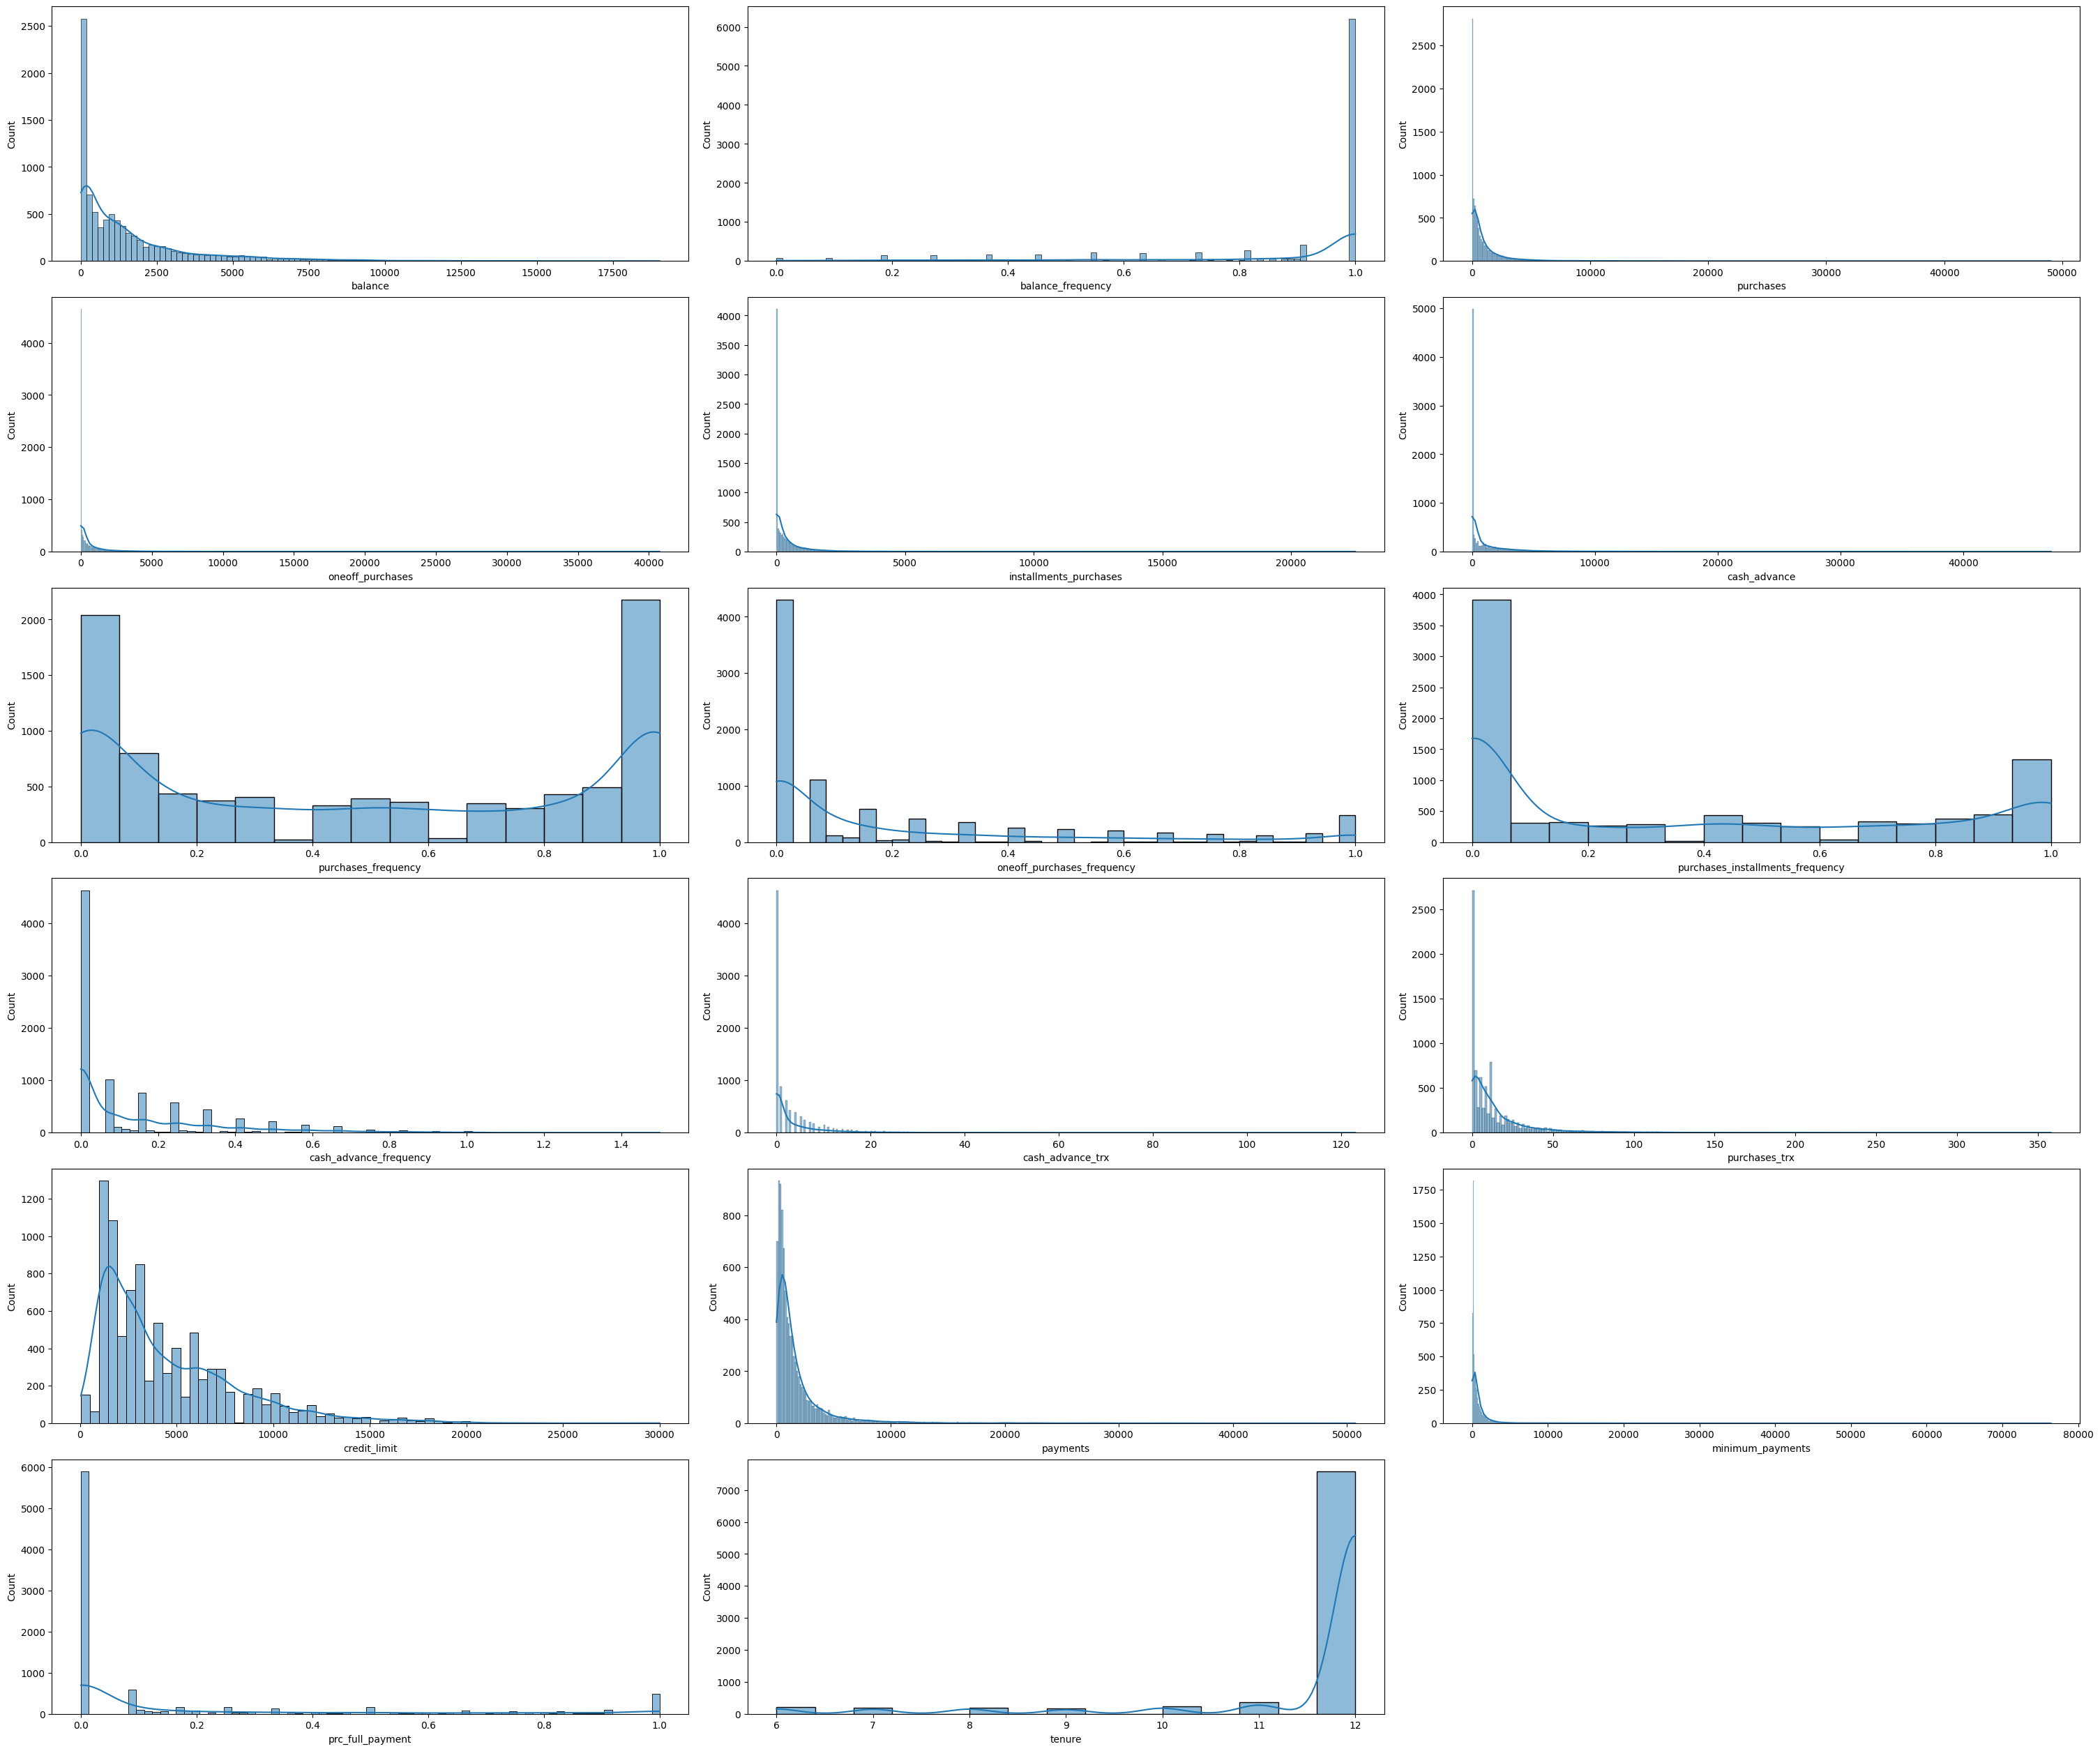

In [4]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df_wo_id.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df_wo_id[df_wo_id.columns[i]], kde=True)

**Key Points:**
* 95% of user have credit limit below 13.000 with balance keep below 8.000. We assume this is the general population of the data reside. [(1)](#1)
* Some feature like `purchases`, `oneoff_purchases`, `INSTALLMENT_purchases`, and `cash_advance` show the same trends as balance and credit limit. [(2)](#2)
* balance frequency for 86% of users are updated frequently. We assume this occured due to the balance updated when the purchase made, installment paid, withdrawal, deposit, and cash advance used.
* There are 2 majority group of customer that made purchase, which is the never or rarely made any purchase and the often one. This could be explained more in after clustering.
* There are more user that paid using installment rather than oneoff payment. We assume the data was obtained from the bank that have high selling points on its credit card facilities.
* By its frequency, there are more user that purchase by installment rather than one off payment. [(3)](#3)
* 98% of users pays the installment below 12.000 with the minimum amount are below 5.000. [(4)](#4)
* Only around 5% user that had completely paid off the installment. We assume this happens due to data was updated periodically.
* 84% of users still use credit card in the 12th month. We assume the data obtained does not include customer that doesn't had credit card.

**For further explanation and figure, please refer to the link beside the point.*

### **Bivariate & Multivariate Analysis**

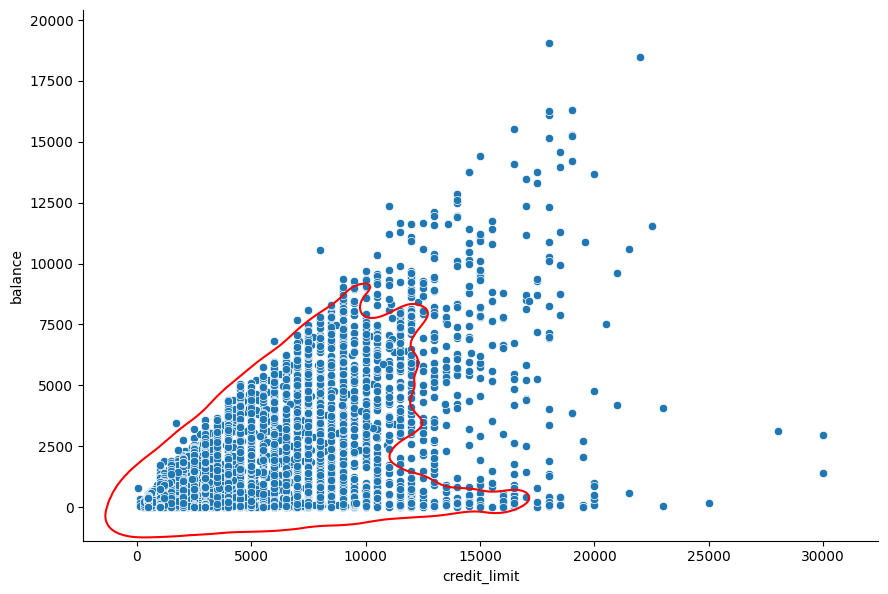

In [5]:
#plot relation credit limit with balance
sns.pairplot(data=df_wo_id, x_vars='credit_limit', y_vars='balance',
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='red');

<a id="1">(1)</a>

The plot explained that most of user are distributed around Credit Limit below 13.000 and balance Below 8.000.

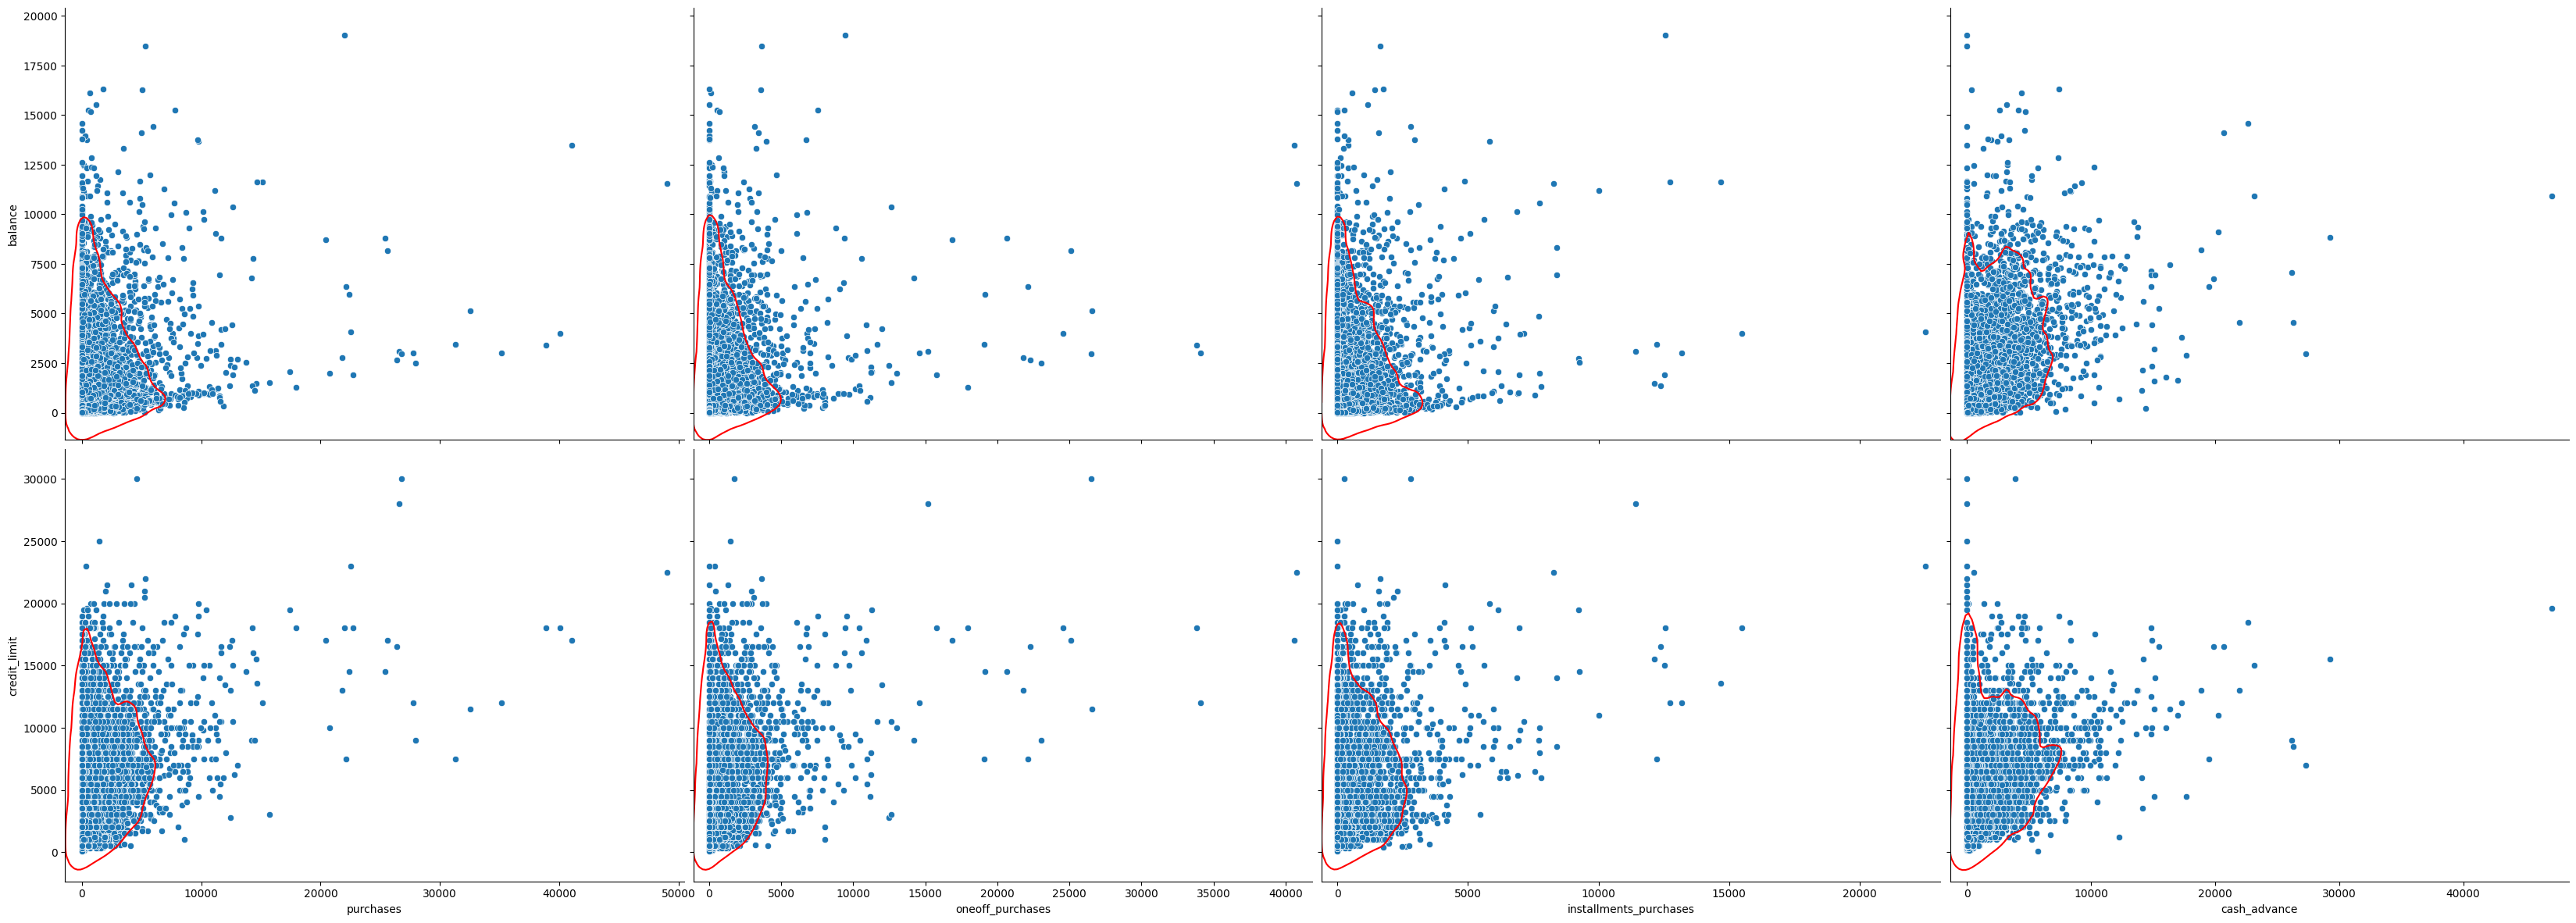

In [6]:
#relation plot between features
sns.pairplot(data=df_wo_id,
             y_vars=['balance', 'credit_limit'],
             x_vars=['purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance'],
            height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red');

<a id="2">(2)</a>

The plot above explained that feature like `purchases`, `oneoff_purchases`, `INSTALLMENT_purchases`, and `cash_advance` are showing trends that similar to credit limit and balance. This due to the balance and credit limit from the users are low, therefore the purchase also low.

In [7]:
#displaying purchase frequency above 0.5
print(len(df_wo_id[df_wo_id['purchases_installments_frequency'] > .5]), 'purchases_installments_frequency')
print(len(df_wo_id[df_wo_id['oneoff_purchases_frequency'] > .5]), 'oneoff_purchases_frequency')

3090 purchases_installments_frequency
1343 oneoff_purchases_frequency


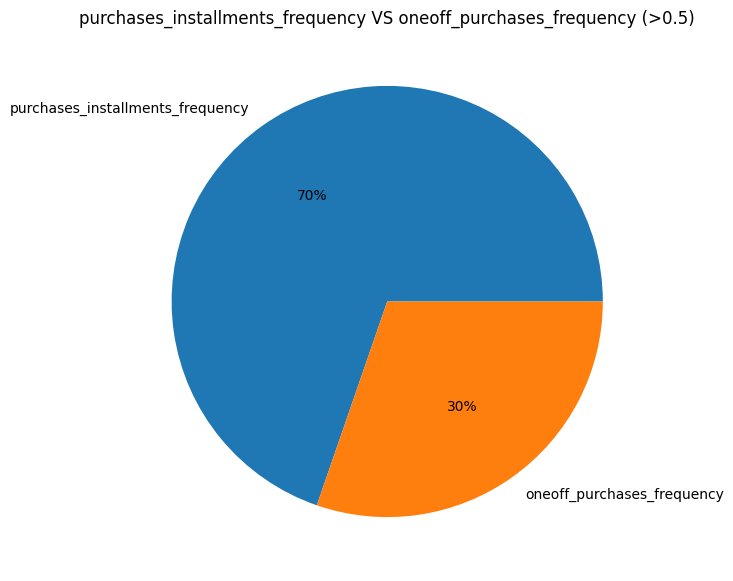

In [8]:
#pie plot for installment vs oneoff
plt.figure(figsize=(7,7))
plt.pie([len(df_wo_id[df_wo_id['purchases_installments_frequency'] > .5]),
         len(df_wo_id[df_wo_id['oneoff_purchases_frequency'] > .5])],
        labels = ['purchases_installments_frequency',
                  'oneoff_purchases_frequency'],
        autopct='%.0f%%')
plt.title('purchases_installments_frequency VS oneoff_purchases_frequency (>0.5)');

<a id="3">(3)</a>

The plot above explained that most of user made purchase using installment rather than one off payment.

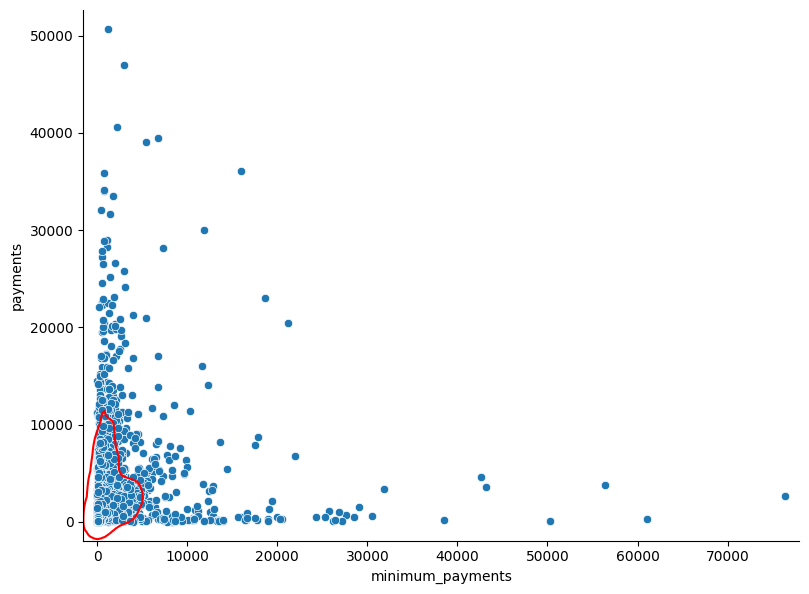

In [9]:
#pair plot for payments vs minimum payments
sns.pairplot(data=df_wo_id, y_vars='payments', x_vars='minimum_payments',
             height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red');

<a id="4">(4)</a>

The plot above explain that in the kde line we can see that the most of users are distributed around had made payment below 12.000 and their minimum payments are below 5.000.

### **Bivariate Analysis**

**Balance**

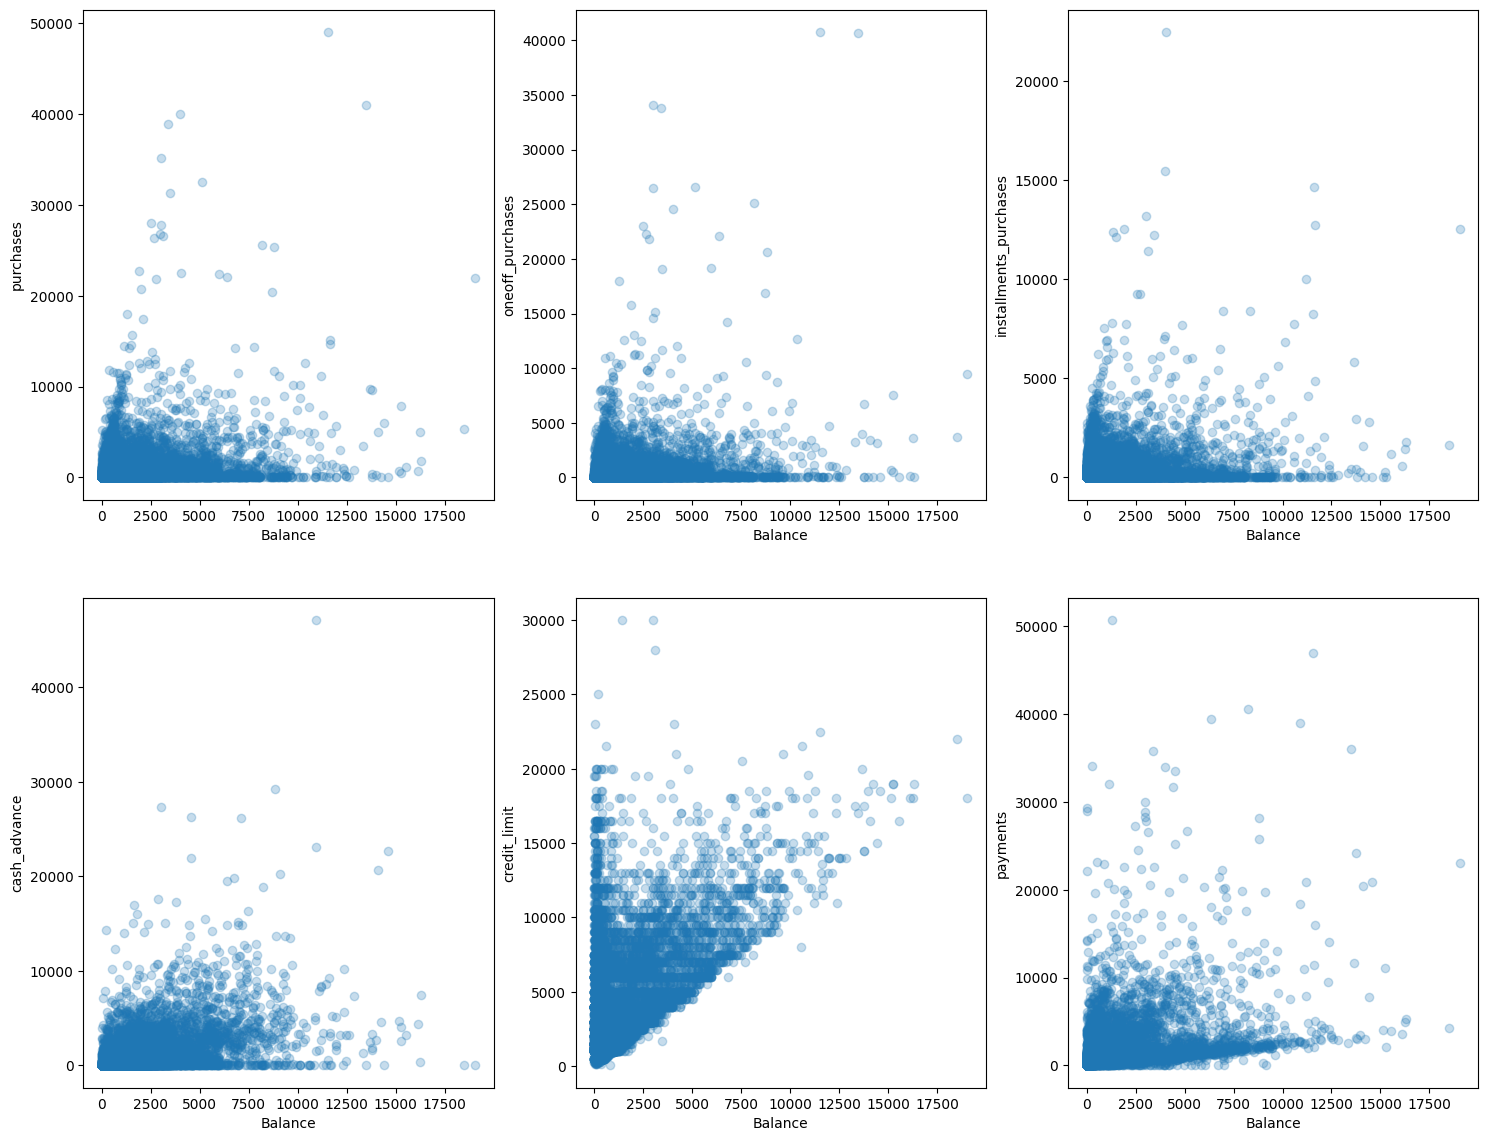

In [10]:
# creating plot analysis
plt.figure(figsize=(18, 14))
columns=['purchases','oneoff_purchases','installments_purchases','cash_advance','credit_limit','payments']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(df_wo_id['balance'], df_wo_id[x], alpha=0.25)
    plt.xlabel('Balance')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

99% of user have balance below 10.000 and most of them(more than around 80%):
- Made total purchases up to 10.000
- Made oneoff purchase up to 5.000
- Made installment purchases up to 5.000
- Use cash in advance up to 10.000
- Have credit_limit up to 15.000
- Made payment up to 10.000

Analysis:

Since most of users have balance up to 10.000 and half of them are paid using oneoff method. Since the customer already have a good spending habits, we should try to think a way to convert this kind of customer to try paid using credit cards.

**Purchase**

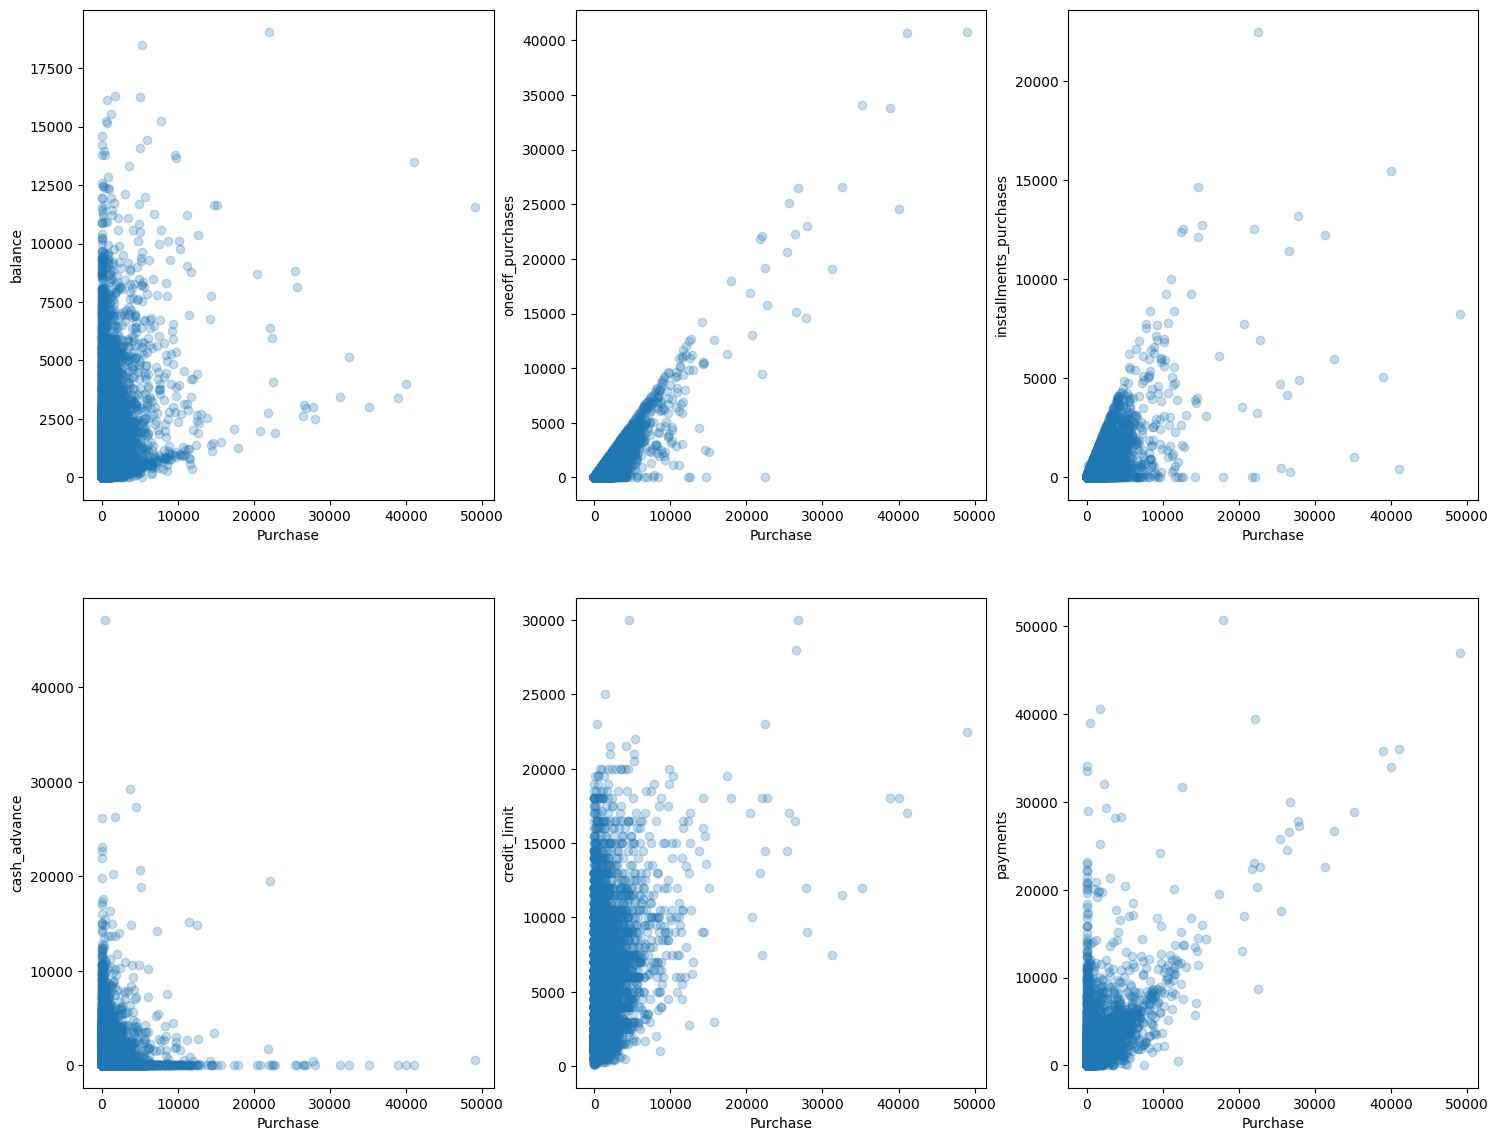

In [11]:
# creating plot analysis
plt.figure(figsize=(18, 14))
columns=['balance','oneoff_purchases','installments_purchases','cash_advance','credit_limit','payments']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(df_wo_id['purchases'], df_wo_id[x], alpha=0.25)
    plt.xlabel('Purchase')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

As observed, 99% customers make purchases up to 10,000 and:
- Have a balance up to 10.000
- Made one off purchases up to 10.000
- Made installment purchases up to 5.000
- Have credit limit up to 20.000
- Made payments up to 20.000
- Use cash in advance up to 10.000

Analysis:

Most of user that made purchase up to 10.000 have credit limit up to 20.000. This means the customer still not use the credit card to its fullest. We assume this occured due to whether the credit interest are too high, bank credit card does not support payment to many outlet, most of user credit card is still new, or there are better credit card than this bank.

**Credit Limit**

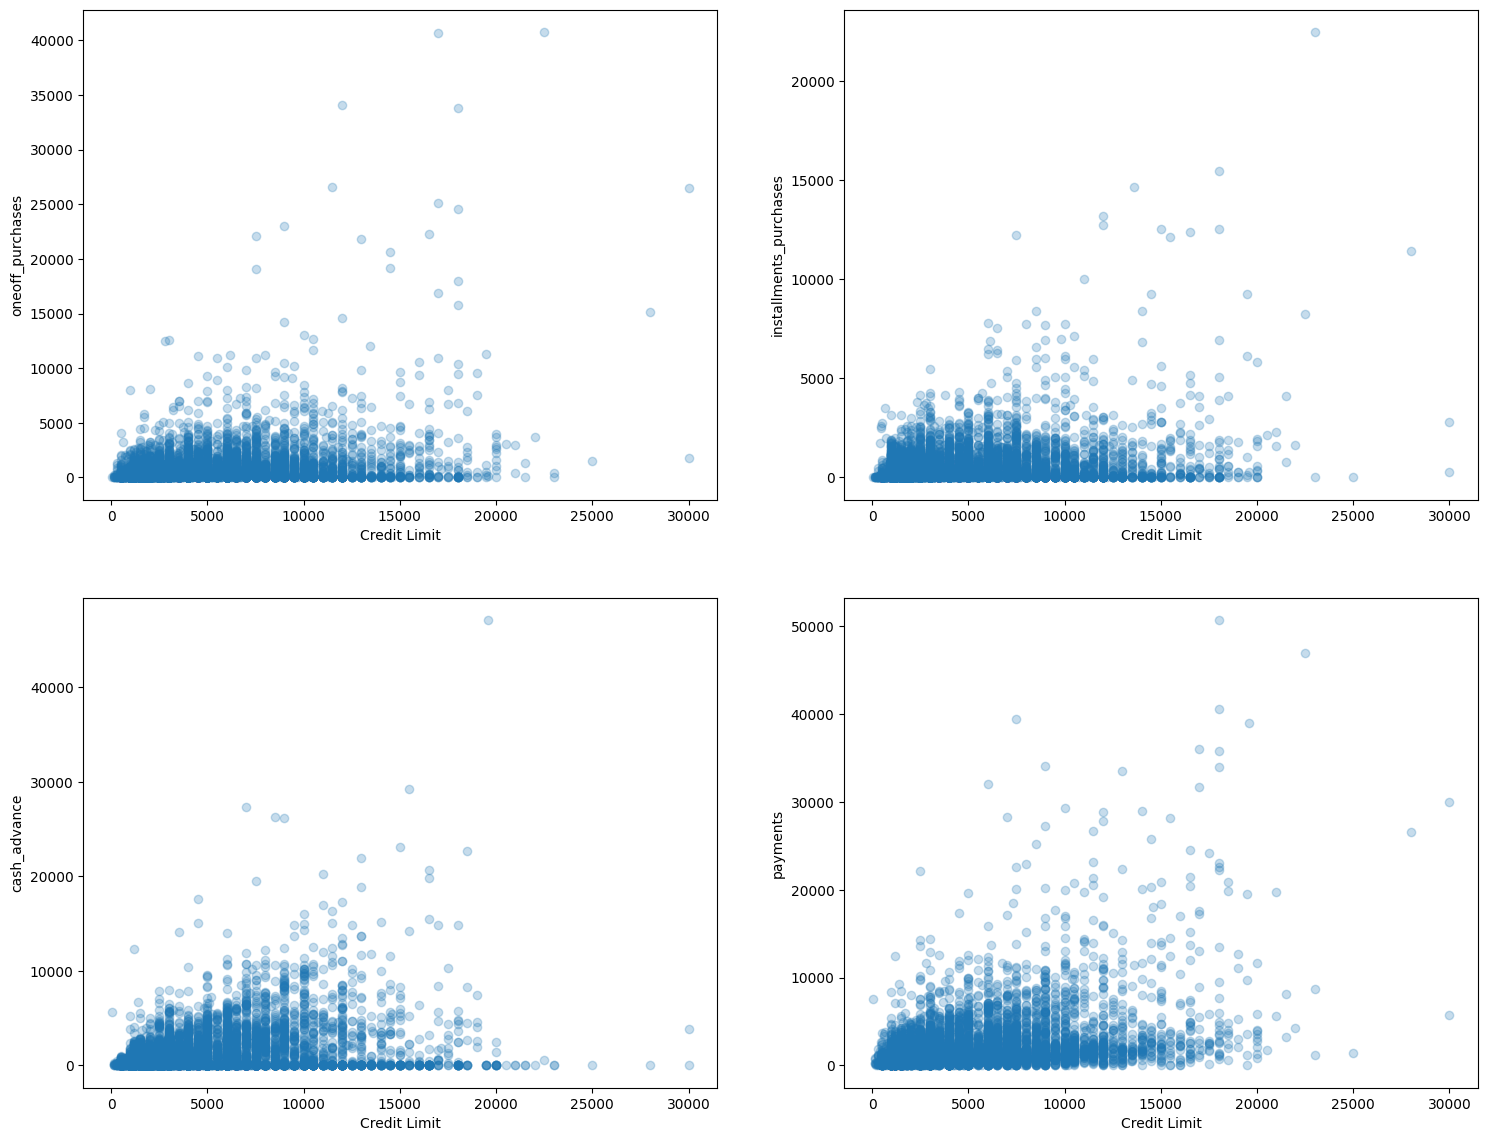

In [12]:
# creating plot
plt.figure(figsize=(18, 14))
columns=['oneoff_purchases','installments_purchases','cash_advance','payments']
n=1
for x in columns:
    plt.subplot(2,2,n)
    plt.scatter(df_wo_id['credit_limit'], df_wo_id[x], alpha=0.25)
    plt.xlabel('Credit Limit')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

99% customers have credit limit up to 20,000 and:
- Made one off purchases up to 5.000
- Made installments purchases up to 5.000
- Made payments up to 10.000
- Use cash in advance up to 10.000

Analysis:

Most of the customer already have a high credit limit. We assume there are no significant problem in the credit limit rather we should analyze the customer behaviour.

### **Multivariate Analysis - Correlation Between Numerical Features**

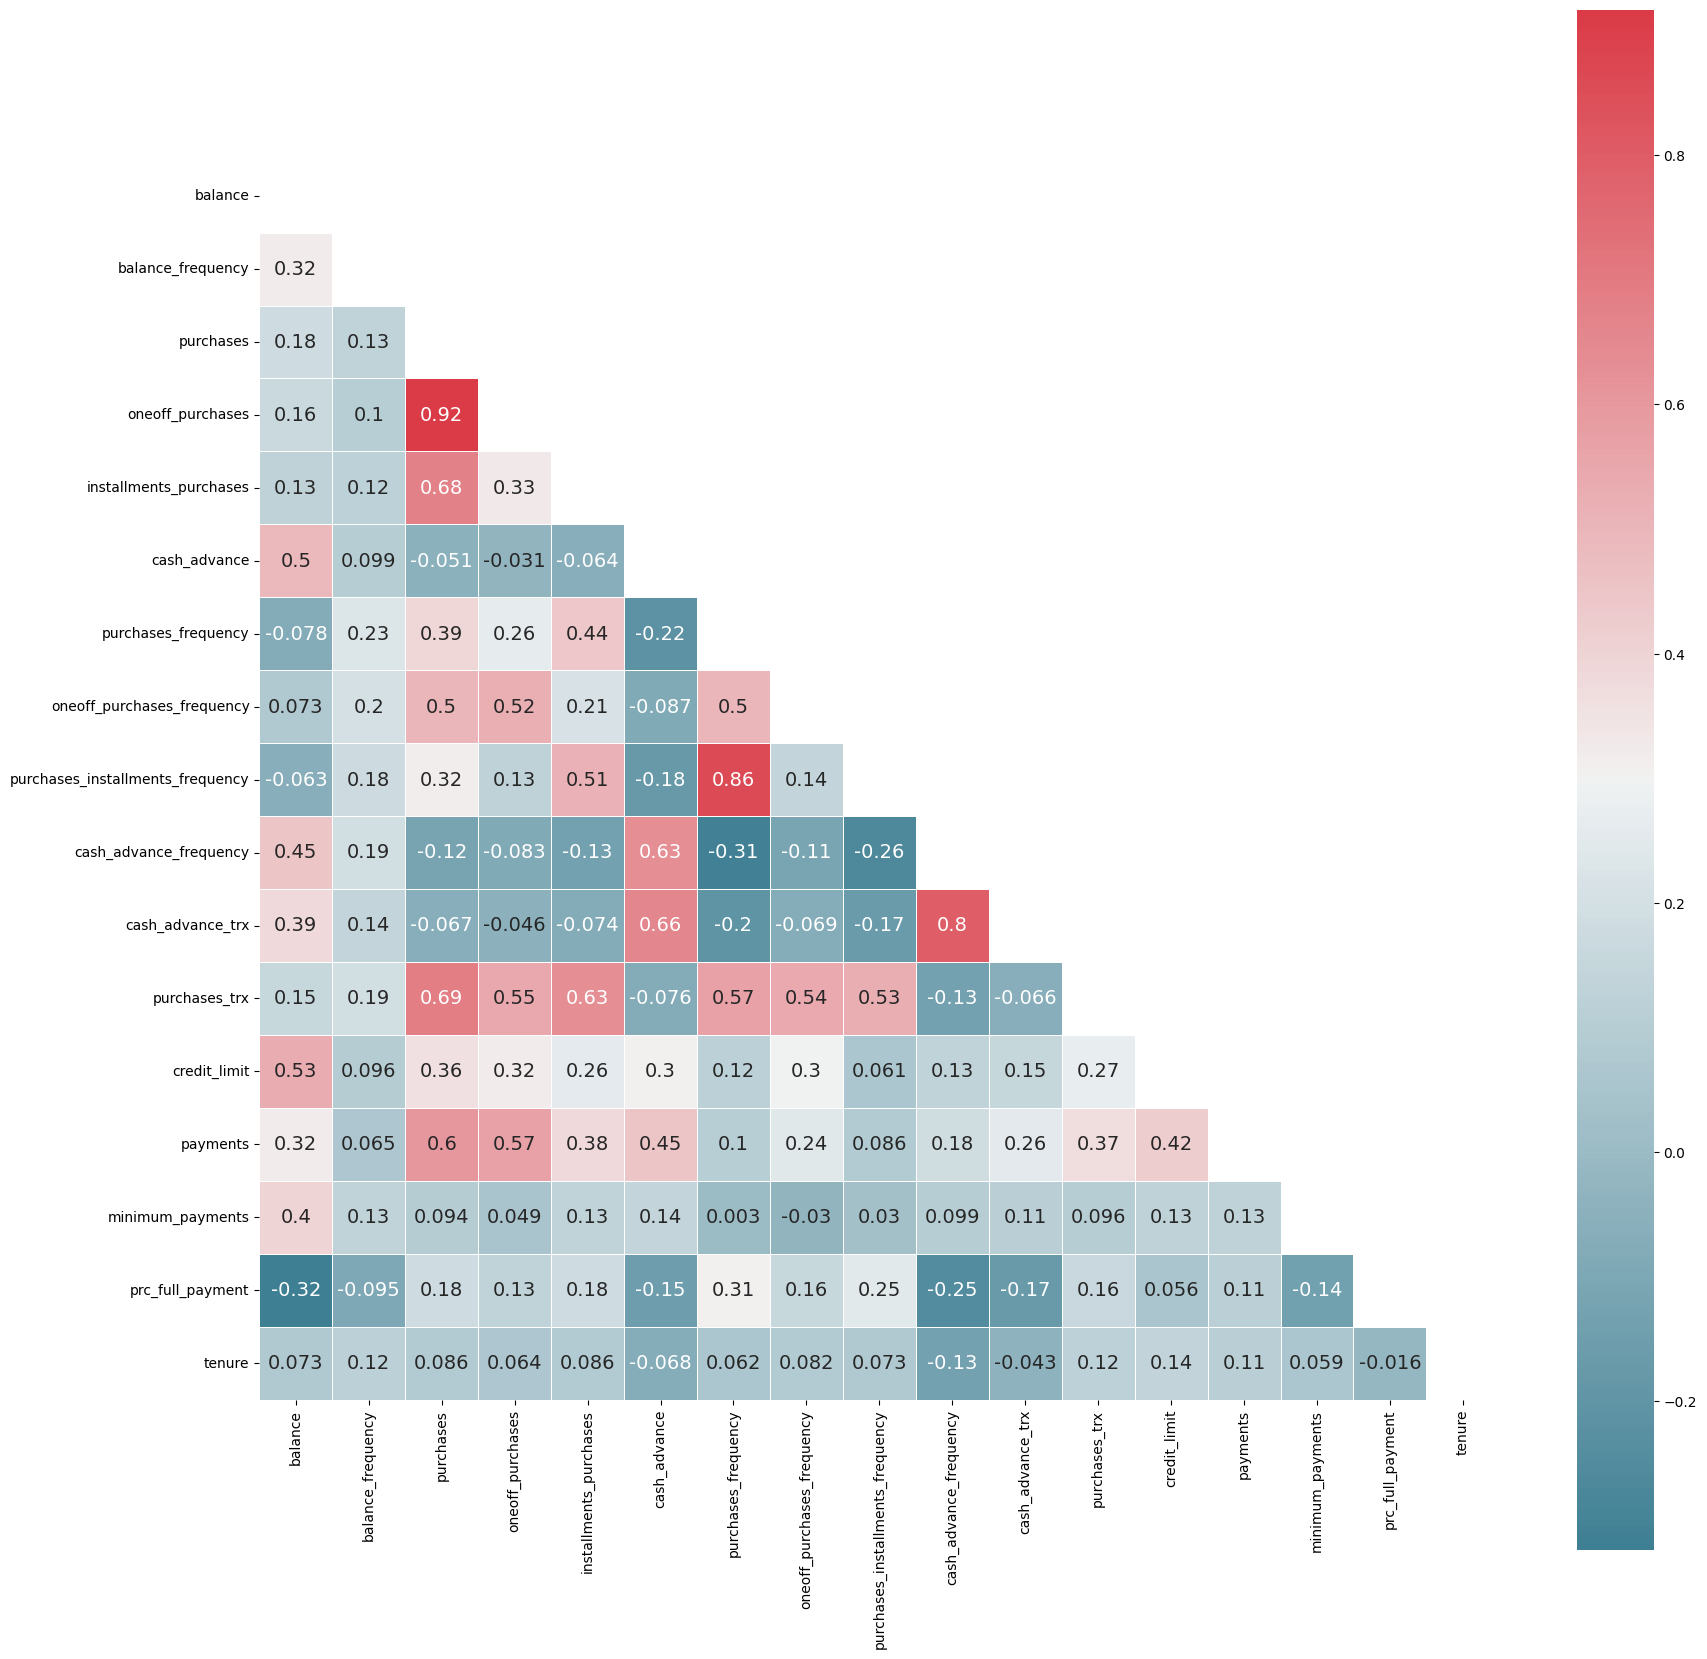

In [13]:
# calculates the correlations
correlation = df_wo_id.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

**Very strong correlations:**

- One off purchases with purchases. This due to one off purchase are part of the purchase.
- purchases installments frequency with purchases frequency. We assume this could indicate payments using installment method happens frequently.
- Cash in advance transactions with Cash in advance frequency. We assume this could indicate that advance payments happens frequently.
- Purchases with purchases transactions. We assume this indicate total purchase consist of many purchase transaction.

**Medium correlations:**

- Installment purchase with purchases. This due to one off purchase are part of the purchase.
- balance with Cash in advance. This due to balance are updated when advance payment occur.
- balance with Cash in advance frequency. We assume this due to every advance payment, the balance are also updated.
- balance with Credit limit. We assume this due to balance are one of major point bank decide credit limit given to the customer.

 <a id="data-preprocessing"></a>
 # **Data Preprocessing**

> ### **Outlier, Anomaly, Duplicates, Identify missing value etc**

In [14]:
# check missing value
df_wo_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [15]:
# Check detailed info for each feature
listItem = []
for col in df_wo_id.columns :
    listItem.append([col, df_wo_id[col].dtype, df_wo_id[col].isna().sum(), round((df_wo_id[col].isna().sum()/len(df_wo_id[col])) * 100,2),
                    df_wo_id[col].nunique(), list(df_wo_id[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  missing value  nullPct  unique  \
0                            balance  float64              0     0.00    8871   
1                  balance_frequency  float64              0     0.00      43   
2                          purchases  float64              0     0.00    6203   
3                   oneoff_purchases  float64              0     0.00    4014   
4             installments_purchases  float64              0     0.00    4452   
5                       cash_advance  float64              0     0.00    4323   
6                purchases_frequency  float64              0     0.00      47   
7         oneoff_purchases_frequency  float64              0     0.00      47   
8   purchases_installments_frequency  float64              0     0.00      47   
9             cash_advance_frequency  float64              0     0.00      54   
10                  cash_advance_trx    int64              0     0.00      65   
11                     purchases_trx    int64              0     0.00     173   
12                      credit_limit  float64              1     0.01     205   
13                          payments  float64              0     0.00    8711   
14                  minimum_payments  float64            313     3.50    8636   
15                  prc_full_payment  float64              0     0.00      47   
16                            tenure    int64              0     0.00       7   

                 uniqueSample  
0       [5.911397, 33.078633]  
1           [0.875, 0.666667]  
2             [209.4, 461.99]  
3             [168.27, 900.0]  
4             [95.76, 103.88]  
5    [547.055908, 271.093275]  
6        [0.583333, 0.428571]  
7             [0.166667, 0.5]  
8        [0.583333, 0.416667]  
9        [0.222222, 1.166667]  
10                   [43, 36]  
11                   [34, 79]  
12          [8300.0, 10450.0]  
13  [1272.434565, 327.627263]  
14   [124.094651, 286.299328]  
15       [0.888889, 0.090909]  
16                     [9, 7]

### **Outlier Detection**

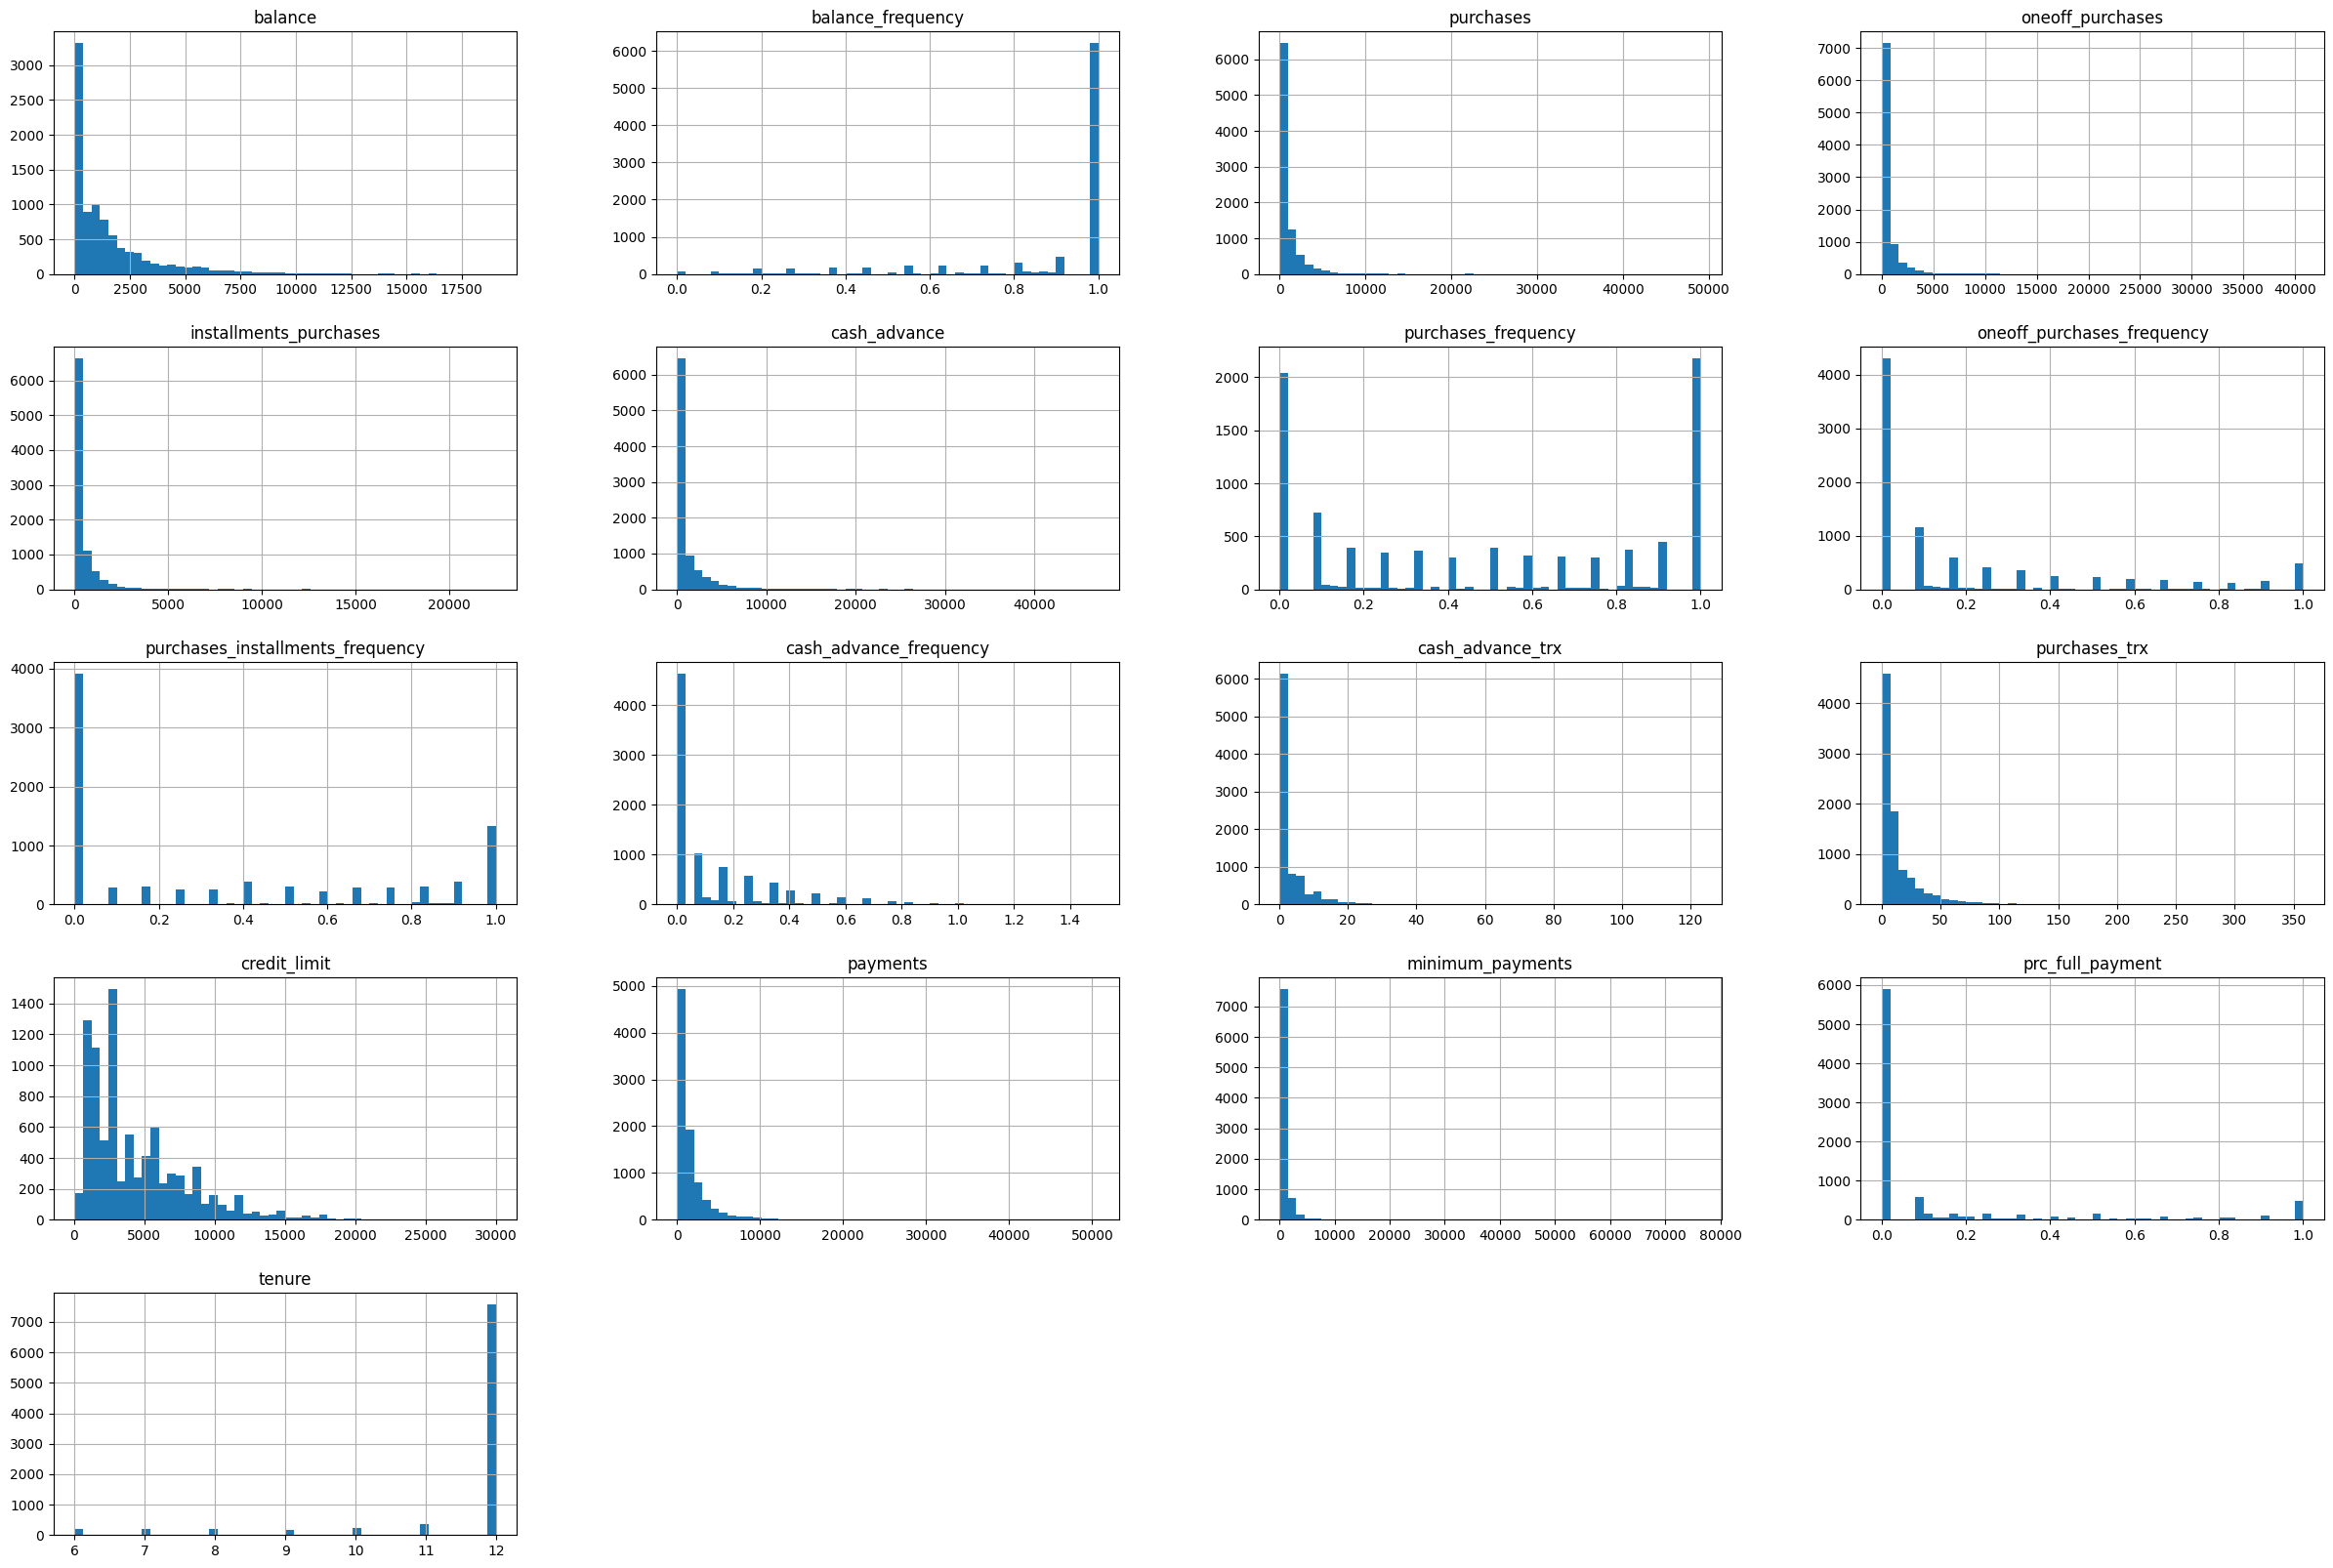

In [16]:
# Distribution plot to visualize data distribution

hist_b_ho = df_wo_id.hist(bins=50,figsize=(30,20))
hist_b_ho
plt.show()

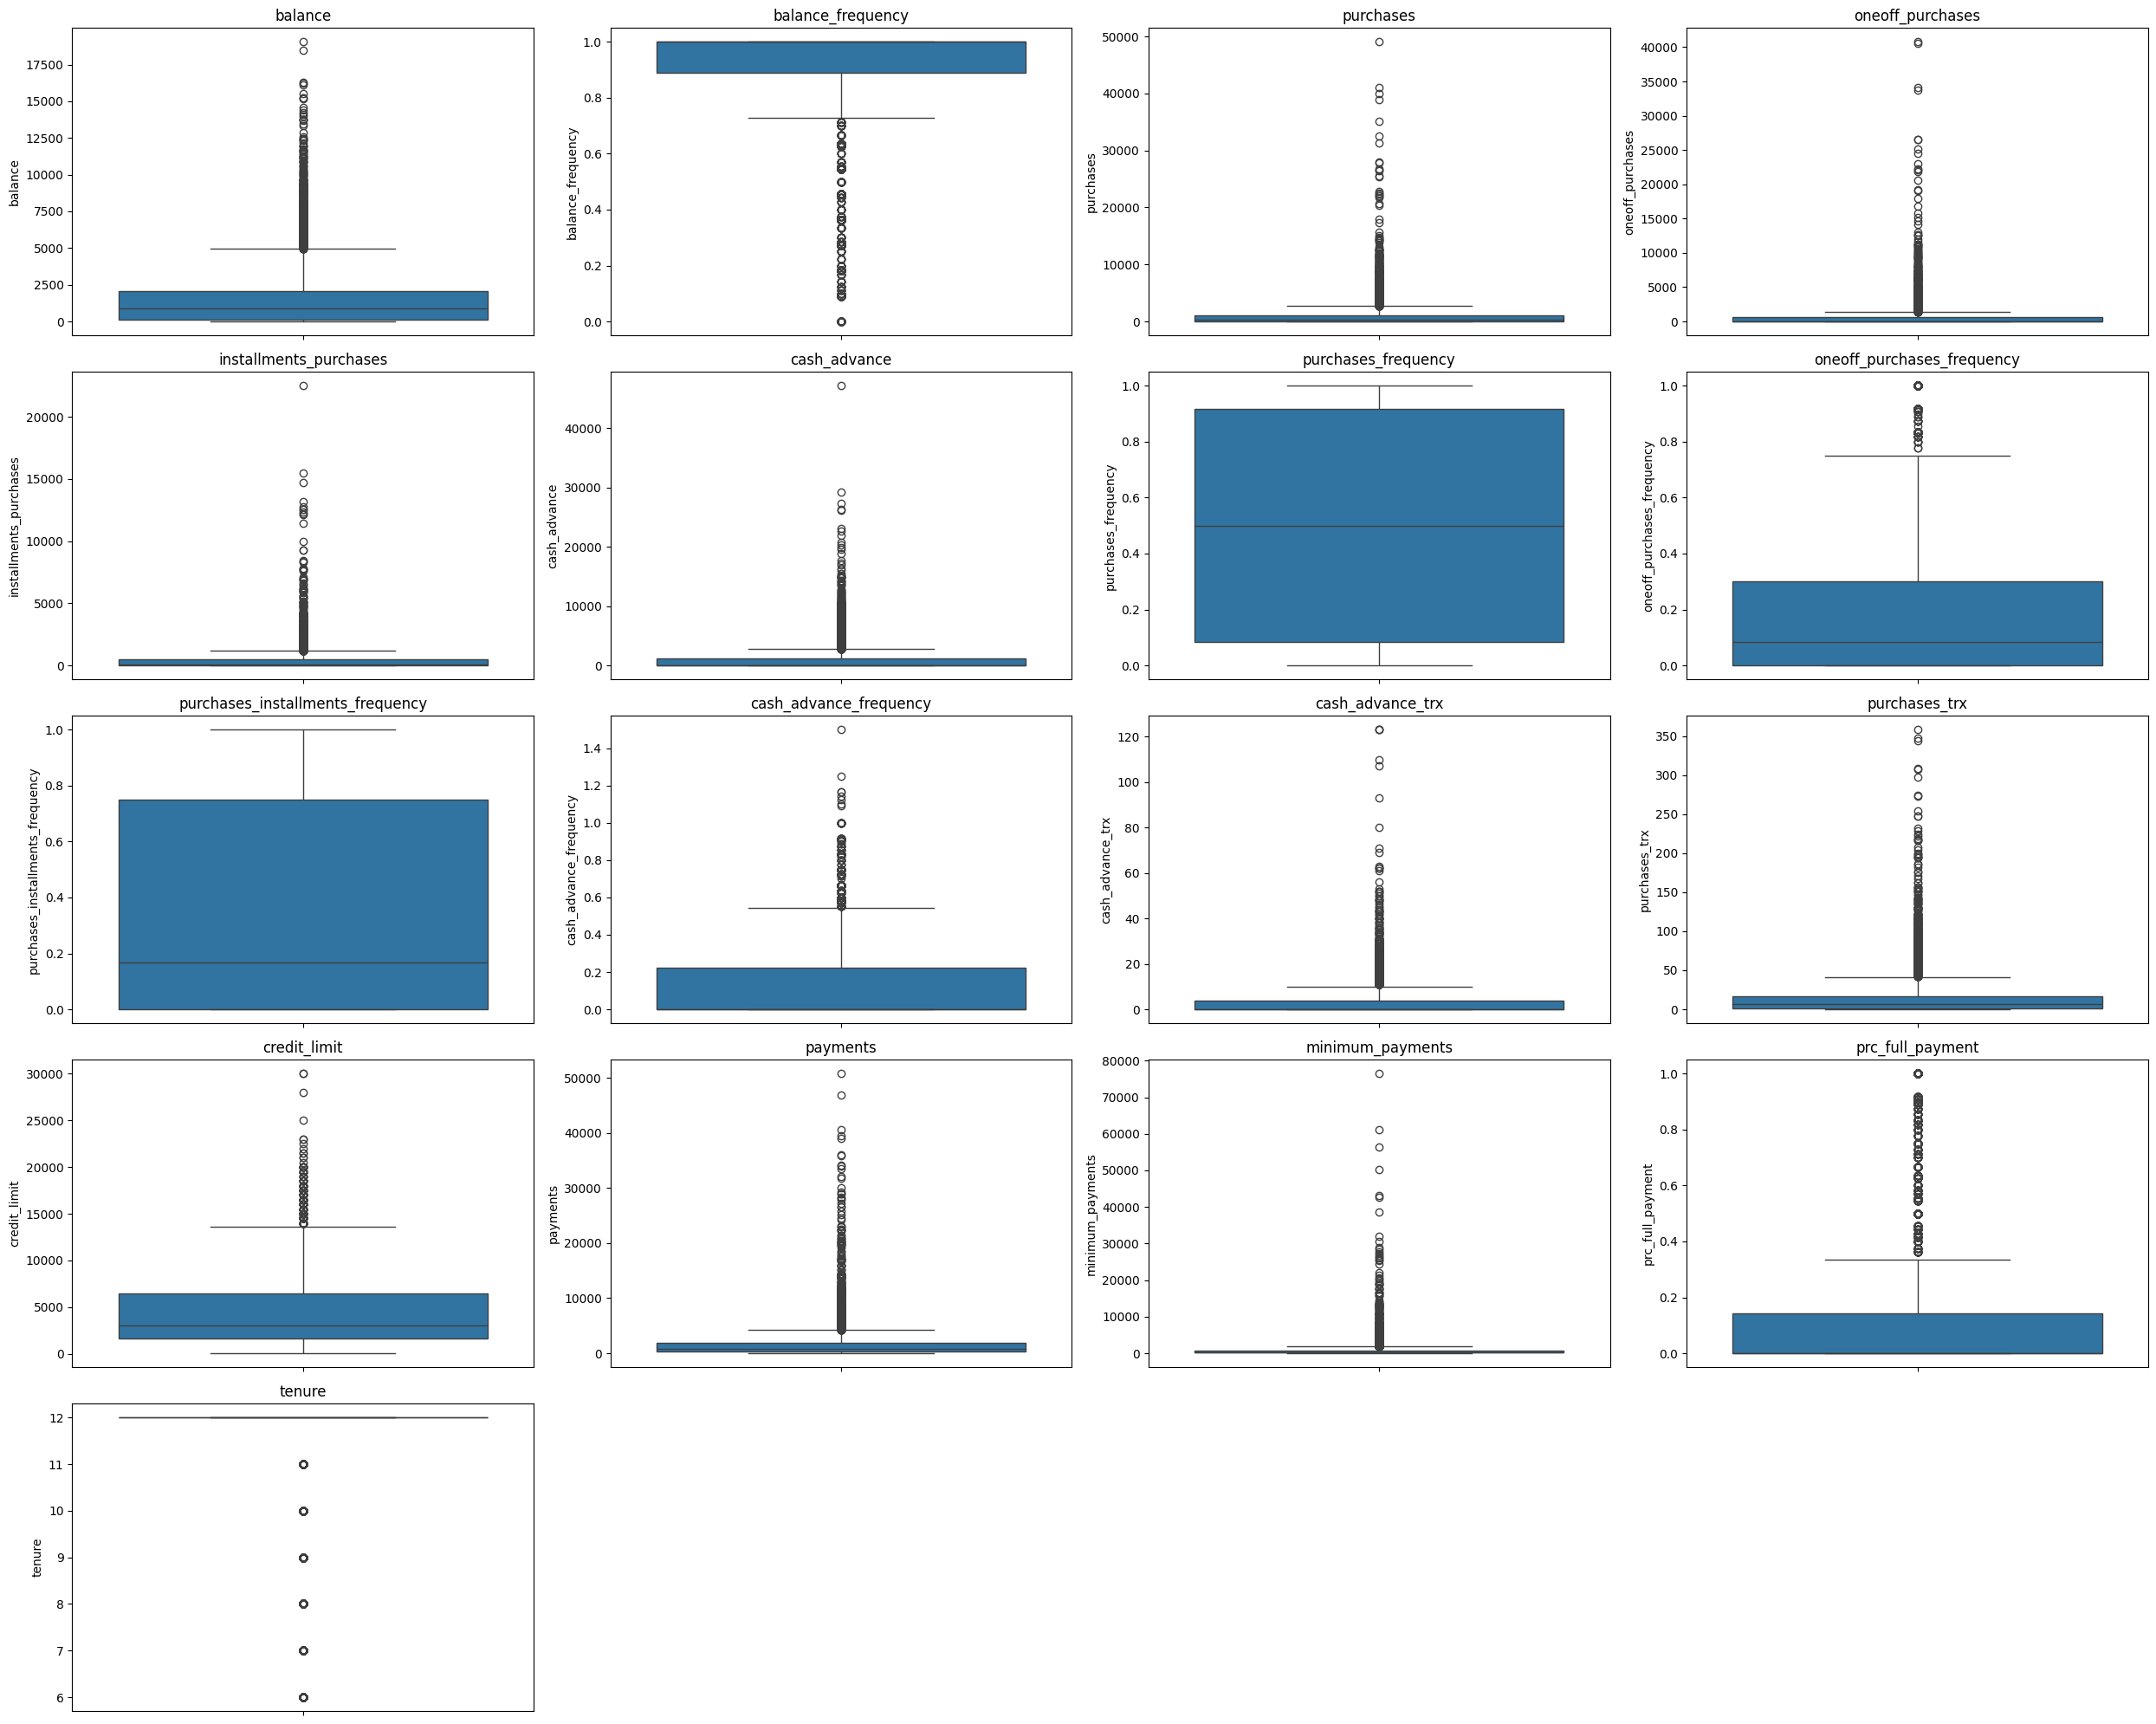

In [17]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df_wo_id.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df_wo_id[df_wo_id.columns[i]])
    plt.title(df_wo_id.columns[i])

plt.tight_layout()

In [18]:
# creating function to generate IQR, lower limit, and Upper limit

def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [19]:
# check IQR, upper limit, and lower limit for each feature

for i in df_wo_id :
    find_outlier(df_wo_id, i)

Outlier balance
IQR: 1925.85812
Lower_Limit: -2760.5052645
Upper_Limit: 4942.9272155
_________________________
Outlier balance_frequency
IQR: 0.11111099999999996
Lower_Limit: 0.7222225000000001
Upper_Limit: 1.1666664999999998
_________________________
Outlier purchases
IQR: 1070.4950000000001
Lower_Limit: -1566.1075000000003
Upper_Limit: 2715.8725000000004
_________________________
Outlier oneoff_purchases
IQR: 577.405
Lower_Limit: -866.1075
Upper_Limit: 1443.5124999999998
_________________________
Outlier installments_purchases
IQR: 468.6375
Lower_Limit: -702.95625
Upper_Limit: 1171.59375
_________________________
Outlier cash_advance
IQR: 1113.8211392500002
Lower_Limit: -1670.7317088750003
Upper_Limit: 2784.5528481250003
_________________________
Outlier purchases_frequency
IQR: 0.833334
Lower_Limit: -1.166668
Upper_Limit: 2.166668
_________________________
Outlier oneoff_purchases_frequency
IQR: 0.3
Lower_Limit: -0.44999999999999996
Upper_Limit: 0.75
_________________________
Outlie

In [20]:
# creating outliers columns
out1 = df_wo_id[df_wo_id['balance'] > 4942.9272155]
out2 = df_wo_id[(df_wo_id['balance_frequency'] < 0.7222225000000001) & (df['balance_frequency'] > 1.1666664999999998)]
out3 = df_wo_id[df_wo_id['purchases'] > 2715.8725000000004]
out4 = df_wo_id[df_wo_id['oneoff_purchases'] > 1443.5124999999998]
out5 = df_wo_id[df_wo_id['installments_purchases'] > 1171.59375]
out6 = df_wo_id[df_wo_id['cash_advance'] > 2784.5528481250003]
out7 = df_wo_id[df_wo_id['purchases_frequency'] > 2.166668]
out8 = df_wo_id[df_wo_id['oneoff_purchases_frequency'] > 0.75]
out9 = df_wo_id[df_wo_id['purchases_installments_frequency'] > 1.875]
out10 = df_wo_id[df_wo_id['cash_advance_frequency'] > 0.555555]
out11 = df_wo_id[df_wo_id['cash_advance_trx'] > 10.0]
out12 = df_wo_id[df_wo_id['purchases_trx'] > 41.0]
out13 = df_wo_id[df_wo_id['credit_limit'] > 13850.0]
out14 = df_wo_id[df_wo_id['payments'] > 4177.921542875]
out15 = df_wo_id[df_wo_id['minimum_payments'] > 1810.0280870000001]
out16 = df_wo_id[df_wo_id['prc_full_payment'] > 0.35714250000000003]
out17 = df_wo_id[(df_wo_id['tenure'] != 12.0)]

In [21]:
# creating outliers dataframe

out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8, out9, out10, out11, out12, out13, out14, out15, out16, out17], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

balance  balance_frequency  purchases  oneoff_purchases  \
15     6886.213231           1.000000    1611.70              0.00   
21     6369.531318           1.000000    6359.95           5910.04   
24     5368.571219           1.000000       0.00              0.00   
28     7152.864372           1.000000     387.05            204.55   
30    12136.219960           1.000000    3038.01           1013.20   
...            ...                ...        ...               ...   
8944    193.571722           0.833333    1012.73           1012.73   
8946     19.183215           1.000000     300.00              0.00   
8947     23.398673           0.833333     144.40              0.00   
8948     13.457564           0.833333       0.00              0.00   
8949    372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
15                   1611.70   2301.491267             0.500000   
21                    449.91    229.028245             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
30                   2024.81   3183.583301             1.000000   
...                      ...           ...                  ...   
8944                    0.00      0.000000             0.333333   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
15                      0.000000                          0.500000   
21                      0.916667                          1.000000   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
30                      0.166667                          1.000000   
...                          ...                               ...   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
15                  0.166667                 4             11        8000.0   
21                  0.333333                 6             92       11250.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
30                  0.500000                10             64       13000.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  
15    1993.439277       2109.906490              0.00      12  
21    2077.959051       1659.775075              0.00      12  
24    1422.726707       1657.002877              0.00      11  
28    1601.448347       1648.851345              0.00      12  
30    4230.323491       3292.015030              0.00      12  
...           ...               ...               ...     ...  
8944     0.000000               NaN              0.00       6  
8946   275.861322               NaN              0.00       6  

In [22]:
#check outliers percentage

print('Percentage Outlier')
len(out_all)/len(df)*100

Percentage Outlier


58.52513966480447

Since the outliers are mainly due to the nature of the dataset, we decide not to drop the outliers. We will try several model that could fit properly with this dataset.

### **Data Anomalies**

In [23]:
#Anomaly 1
df_wo_id[df_wo_id['balance'] > df_wo_id['credit_limit']]

balance  balance_frequency  purchases  oneoff_purchases  \
5     1809.828751                1.0    1333.28               0.0   
10    1293.124939                1.0     920.12               0.0   
20    2016.684686                1.0     176.68               0.0   
64    1923.886805                1.0    1887.64               0.0   
78    1205.716678                1.0       0.00               0.0   
...           ...                ...        ...               ...   
8589  1283.337407                1.0    1022.41             171.6   
8614  1182.080141                1.0     266.68               0.0   
8624  1012.089680                1.0     312.48               0.0   
8724  3002.791004                1.0    2463.00            2463.0   
8873  1023.883008                1.0     585.84               0.0   

      installments_purchases  cash_advance  purchases_frequency  \
5                    1333.28      0.000000             0.666667   
10                    920.12      0.000000             1.000000   
20                    176.68      0.000000             0.666667   
64                   1887.64   1605.949371             1.000000   
78                      0.00     38.325801             0.000000   
...                      ...           ...                  ...   
8589                  850.81   1158.035224             0.875000   
8614                  266.68    848.848179             0.666667   
8624                  312.48      0.000000             1.000000   
8724                    0.00    797.158950             0.166667   
8873                  585.84    956.849209             1.000000   

      oneoff_purchases_frequency  purchases_installments_frequency  \
5                       0.000000                          0.583333   
10                      0.000000                          1.000000   
20                      0.000000                          0.666667   
64                      0.000000                          1.000000   
78                      0.000000                          0.000000   
...                          ...                               ...   
8589                    0.125000                          0.750000   
8614                    0.000000                          0.666667   
8624                    0.000000                          1.000000   
8724                    0.166667                          0.000000   
8873                    0.000000                          0.875000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
5                   0.000000                 0              8        1800.0   
10                  0.000000                 0             12        1200.0   
20                  0.000000                 0              8        2000.0   
64                  0.083333                 4             61        1850.0   
78                  0.083333                 1              0        1200.0   
...                      ...               ...            ...           ...   
8589                0.250000                 5             16        1200.0   
8614                0.083333                 6              8        1000.0   
8624                0.000000                 0             12        1000.0   
8724                0.166667                 3              3        3000.0   
8873                0.125000                 2             22        1000.0   

         payments  minimum_payments  prc_full_payment  tenure  
5     1400.057770       2407.246035          0.000000      12  
10    1083.301007       2172.697765          0.000000      12  
20     223.068600      13557.297260          0.000000      12  
64    3688.045998       3266.996777          0.083333      12  
78      29.278671       8242.687678          0.000000      12  
...           ...               ...               ...     ...  
8589   846.998942       1838.410150          0.000000       8  
8614   119.861878       8607.234543          0.000000      12  
8624   325

Feature "balance" are the balance amount of customer had in their bank account

In [24]:
# Anomaly 2
df_wo_id[df_wo_id['minimum_payments'] > df_wo_id['payments']]

balance  balance_frequency  purchases  oneoff_purchases  \
2     2495.148862           1.000000     773.17            773.17   
5     1809.828751           1.000000    1333.28              0.00   
10    1293.124939           1.000000     920.12              0.00   
14    2772.772734           1.000000       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
...           ...                ...        ...               ...   
8933   735.652303           1.000000     619.60            255.62   
8939   728.352548           1.000000     734.40            734.40   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
2                       0.00      0.000000             1.000000   
5                    1333.28      0.000000             0.666667   
10                    920.12      0.000000             1.000000   
14                      0.00    346.811390             0.000000   
15                   1611.70   2301.491267             0.500000   
...                      ...           ...                  ...   
8933                  363.98    546.902403             1.000000   
8939                    0.00    239.891038             0.333333   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
2                       1.000000                          0.000000   
5                       0.000000                          0.583333   
10                      0.000000                          1.000000   
14                      0.000000                          0.000000   
15                      0.000000                          0.500000   
...                          ...                               ...   
8933                    0.166667                          0.833333   
8939                    0.333333                          0.000000   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
2                   0.000000                 0             12        7500.0   
5                   0.000000                 0              8        1800.0   
10                  0.000000                 0             12        1200.0   
14                  0.083333                 1              0        3000.0   
15                  0.166667                 4             11        8000.0   
...                      ...               ...            ...           ...   
8933                0.166667                 5             16        1000.0   
8939                0.166667                 2              2        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  
2      622.066742        627.284787              0.00      12  
5     1400.057770       2407.246035              0.00      12  
10    1083.301007       2172.697765              0.00      12  
14     805.647974        989.962866              0.00      12  
15    1993.439277       2109.906490              0.00      12  
...           ...               ...               ...     ...  
8933   106.138603        337.294767              0.00       6  
8939    72.530037        110.950798              0.00       6  
8947    81

minimum payment are above payments due to several things:
- Bank approve the payment for some particular transaction
- The minimum payment has not yet updated by the system
- Customer didn't notice the minimum payments, this could result the payment are not recognized as installment by the system
- Other various reason due to difference in credit policy

In [25]:
# Anomaly 3
df_wo_id[df_wo_id['installments_purchases'] > df_wo_id['credit_limit']]

balance  balance_frequency  purchases  oneoff_purchases  \
64    1923.886805           1.000000    1887.64              0.00   
180    903.297810           1.000000    2697.48            150.50   
185    168.522709           0.818182    2009.05              0.00   
231    279.608696           1.000000    3034.92              0.00   
295    635.090434           0.818182    5758.71           2252.37   
...           ...                ...        ...               ...   
8788   133.099445           1.000000    1170.00              0.00   
8836   112.037368           1.000000    1006.69              0.00   
8837   272.624436           0.888889    1843.00            470.00   
8856   227.220411           1.000000    1387.60            288.54   
8883   931.907808           1.000000    1142.12              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
64                   1887.64   1605.949371             1.000000   
180                  2546.98      0.000000             1.000000   
185                  2009.05      0.000000             0.833333   
231                  3034.92      0.000000             1.000000   
295                  3506.34      0.000000             0.750000   
...                      ...           ...                  ...   
8788                 1170.00      0.000000             1.000000   
8836                 1006.69      0.000000             1.000000   
8837                 1373.00      0.000000             0.666667   
8856                 1099.06    107.660394             1.000000   
8883                 1142.12   1113.924335             1.000000   

      oneoff_purchases_frequency  purchases_installments_frequency  \
64                      0.000000                          1.000000   
180                     0.333333                          1.000000   
185                     0.000000                          0.750000   
231                     0.000000                          1.000000   
295                     0.250000                          0.750000   
...                          ...                               ...   
8788                    0.000000                          0.900000   
8836                    0.000000                          0.888889   
8837                    0.111111                          0.444444   
8856                    0.875000                          0.875000   
8883                    0.000000                          0.857143   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
64                  0.083333                 4             61        1850.0   
180                 0.000000                 0             39        2500.0   
185                 0.000000                 0             22        1200.0   
231                 0.000000                 0             12        2900.0   
295                 0.000000                 0             48        2900.0   
...                      ...               ...            ...           ...   
8788                0.000000                 0             12        1000.0   
8836                0.000000                 0             11        1000.0   
8837                0.000000                 0              6        1000.0   
8856                0.125000                 1             71        1000.0   
8883                0.285714                 3             14        1000.0   

         payments  minimum_payments  prc_full_payment  tenure  
64    3688.045998       3266.996777          0.083333      12  
180   1686.196344        303.361632          0.000000      12  
185   2612.760497        197.638558          0.142857      12  
231   2928.909865       2733.317012          0.083333      12  
295   7943.570210        197.416104          1.000000      12  
...           ...               ...               ...     ...  
8788  1068.502534        161.816503          0.444444      10  
8836  1000.036596        123.408318          1.000000       9  
8837  1477

installments purchases above credit limit due to several things:
- The bank system has not yet updated the credit limit, but already approved the installment
- The installment purchase are nominal account which include all of the installment purchase made whether the installment have been settled or not

In [26]:
# Anomaly 4
df_wo_id[df_wo_id['cash_advance_frequency'] > 1]

balance  balance_frequency  purchases  oneoff_purchases  \
681   5656.069801           1.000000     362.36            362.36   
1626  2876.009336           1.000000     152.61            152.61   
2555  5906.184924           1.000000     141.80            141.80   
2608  7801.511533           1.000000     231.40            231.40   
3038  3846.742530           1.000000       0.00              0.00   
3253  5709.486507           0.833333       0.00              0.00   
8055  1917.895730           1.000000     285.07            285.07   
8365  3857.562230           1.000000       0.00              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      oneoff_purchases_frequency  purchases_installments_frequency  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         payments  minimum_payments  prc_full_payment  tenure  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

Since the amount of cash_advance_frequency above 1 are below 1%, we decide to change the amount to 1, with assumption that the change will not harm the data distribution.

In [27]:
# change cash_advance_frequency above 1 to 1
cash_advance_freq_more_than_1 = df_wo_id[df_wo_id['cash_advance_frequency'] > 1].index
df_wo_id['cash_advance_frequency'].iloc[cash_advance_freq_more_than_1] = 1

#check whether there is still cash_advance_frequency above 1
df_wo_id[df_wo_id['cash_advance_frequency'] > 1].cash_advance_frequency.any()

False

### **Duplicated**

In [28]:
#check whether there is any duplicate value
df_wo_id[df_wo_id.duplicated()]

Empty DataFrame
Columns: [balance, balance_frequency, purchases, oneoff_purchases, installments_purchases, cash_advance, purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, cash_advance_trx, purchases_trx, credit_limit, payments, minimum_payments, prc_full_payment, tenure]
Index: []

### **Missing Value**

In [29]:
# check missing value
df_wo_id.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

<Axes: >

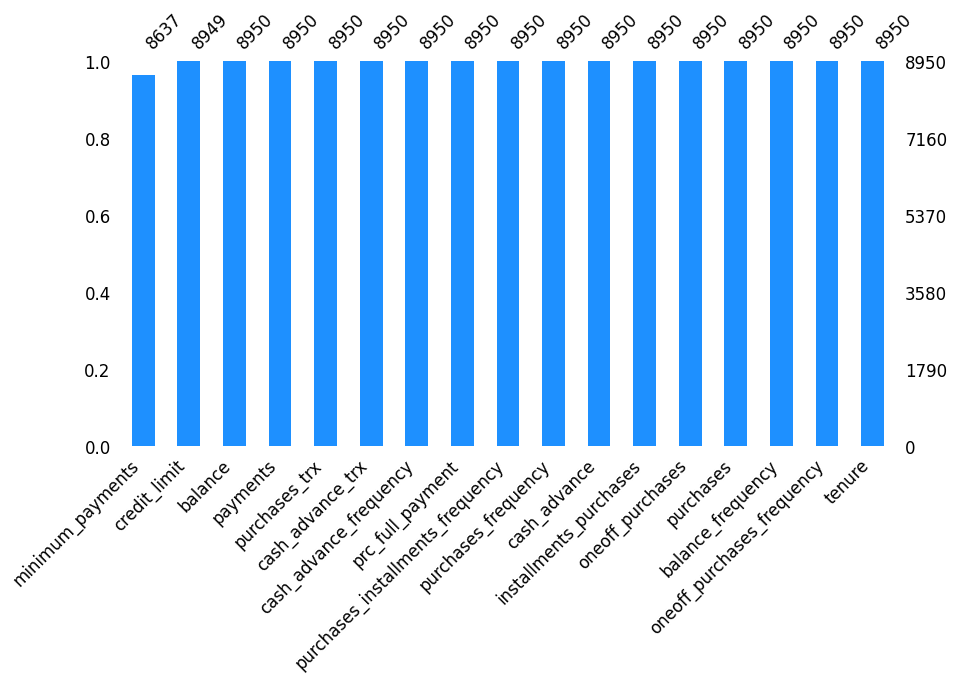

In [30]:
# plot to visualize the missing value proportion
missingno.bar(df_wo_id,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

We found that some feature have a missing value, which is "minimum_payments" amounting to 313 and "credit_limit" amounting to 1. We decided to handle it :
1. Fill the the missing value for Credit Limit that had zero value in payments with 0, since we assume that if the payments is zero, the credit limit should be zero too
2. Fill the rest of missing value using Simple Imputer with median as its initial strategy.

### **Handling Missing Value using Iterative Imputer**

In [31]:
# import library

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
# filling missing value with iterative imputer
feat_cols = [col for col in df_wo_id.columns]

itr_imputer = IterativeImputer(initial_strategy='median',
                               min_value=0, random_state=2022)

df[feat_cols] = itr_imputer.fit_transform(df[feat_cols])

<Axes: >

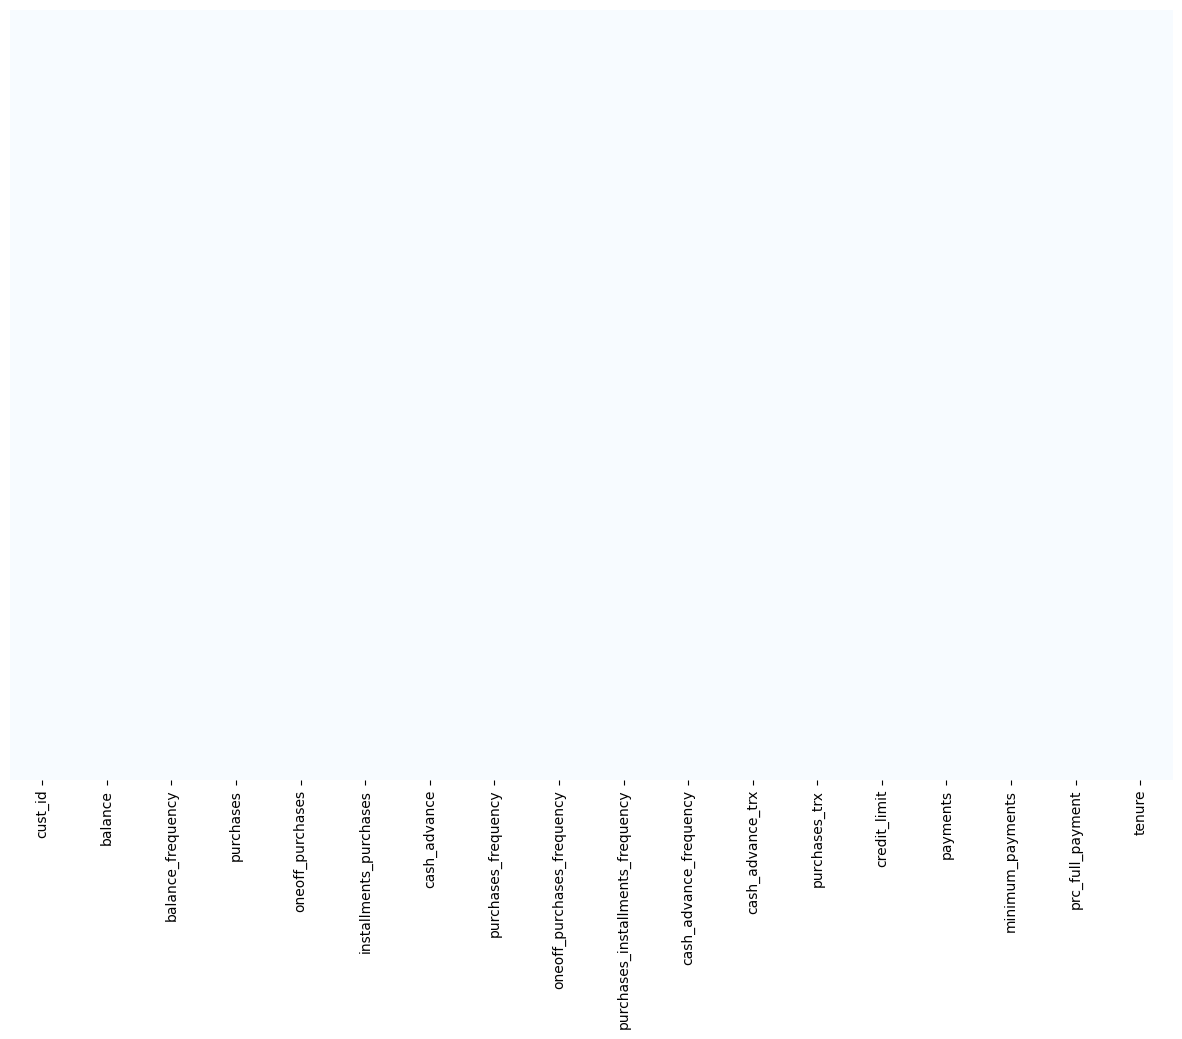

In [33]:
# plot to check the missing value
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)

In [34]:
# checking the missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   float64
 12  purcha

In [35]:
# creating new variable for modeling
df_model = df.copy()

### **Feature Selection**

Since our purpose in this project is clustering (customer segmentation) and only process the clustering using a customer behaviour related feature, we decided to drop several feature
- cust_id : we assume this feature only serve as indexing.
- balance : we assume this feature does not potrait customer behaviour.
- purchases : we assume this feature are already explained by installment_purchase and oneoff_purchase.
- cash_advance : we assume this feature shows the amount of cash advance. this feature represented by cash_advance_frequency.
- cash_adavance_trx : we assume this feature shows the number of cash advance made. this feature represented by cash_advance_frequency.
- purchase_trx : we assume this feature shows the number of purchase made. this feature represented by purchase frequency.
- credit_limit : we assume this feature does not potrait customer behaviour.
- payments : we assume this feature shows the amount of payments made and already represented by payments proportion.
- minimum_payments : we assume this feature does not potrait customer behaviour.
- tenure : we assume this feature does not potrait customer behaviour.


Reference :
https://medium.com/moderncompany/using-behavioral-segmentation-to-understand-your-customers-87f3553f3cf8

In [36]:
# droppping unused feature
df_model.drop(['cust_id', 'balance', 'purchases',
           'cash_advance', 'cash_advance_trx',
           'purchases_trx', 'credit_limit',
           'payments', 'minimum_payments', 'tenure'],
          axis=1, inplace=True, errors='ignore')
df_model.columns

Index(['balance_frequency', 'oneoff_purchases', 'installments_purchases',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'prc_full_payment'],
      dtype='object')

Since the amount contains no specific information we also made a change to oneoff_purchase to oneoff_proportion and installments_purchase to installments_proportion for better understanding in the purchase behaviour.

In [37]:
# change oneoff_purchase to oneoff_proportion
oneoff_proportion = df_wo_id['oneoff_purchases'] / df_wo_id['purchases']

# change installments_purchase to installments_proportion
installments_proportion = df_wo_id['installments_purchases'] / df_wo_id['purchases']

In [38]:
# rename columns
df_model.rename(columns={'oneoff_purchases_frequency': 'oneoff_frequency',
                     'purchases_installments_frequency': 'installments_frequency',
                     'prc_full_payment': 'payments_proportion'},
            inplace=True, errors='ignore')
df_model.columns

Index(['balance_frequency', 'oneoff_purchases', 'installments_purchases',
       'purchases_frequency', 'oneoff_frequency', 'installments_frequency',
       'cash_advance_frequency', 'payments_proportion'],
      dtype='object')

In [39]:
# check changed feature
df_model.head().T

0         1       2            3          4
balance_frequency        0.818182  0.909091    1.00     0.636364   1.000000
oneoff_purchases         0.000000  0.000000  773.17  1499.000000  16.000000
installments_purchases  95.400000  0.000000    0.00     0.000000   0.000000
purchases_frequency      0.166667  0.000000    1.00     0.083333   0.083333
oneoff_frequency         0.000000  0.000000    1.00     0.083333   0.083333
installments_frequency   0.083333  0.000000    0.00     0.000000   0.000000
cash_advance_frequency   0.000000  0.250000    0.00     0.083333   0.000000
payments_proportion      0.000000  0.222222    0.00     0.000000   0.000000

In [40]:
# creating function for detailed descriptive analytic
def summary_stats(df_model, n=4):
    # central tendency: mean, median
    mean = pd.DataFrame(df_model.apply(np.mean)).T
    median = pd.DataFrame(df_model.apply(np.median)).T

    # distribution: ,std, min, max, range, skew, kurtosis
    std = pd.DataFrame(df_model.apply(np.std)).T
    min_value = pd.DataFrame(df_model.apply(min)).T
    max_value = pd.DataFrame(df_model.apply(max)).T
    range_value = pd.DataFrame(df_model.apply(lambda x: x.max() - x.min())).T
    skewness = pd.DataFrame(df_model.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df_model.apply(lambda x: x.kurtosis())).T

    # concatenates
    summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
    summary_stats.columns = ['attributes','min','max', 'range','mean','median', 'std','skewness','kurtosis']

    return round(summary_stats, n)

In [41]:
# descriptive analytic for modeling feature
summary_stats(df_model)

attributes  min       max     range      mean   median  \
0       balance_frequency  0.0      1.00      1.00    0.8773   1.0000   
1        oneoff_purchases  0.0  40761.25  40761.25  592.4374  38.0000   
2  installments_purchases  0.0  22500.00  22500.00  411.0676  89.0000   
3     purchases_frequency  0.0      1.00      1.00    0.4904   0.5000   
4        oneoff_frequency  0.0      1.00      1.00    0.2025   0.0833   
5  installments_frequency  0.0      1.00      1.00    0.3644   0.1667   
6  cash_advance_frequency  0.0      1.50      1.50    0.1351   0.0000   
7     payments_proportion  0.0      1.00      1.00    0.1537   0.0000   

         std  skewness  kurtosis  
0     0.2369   -2.0233    3.0924  
1  1659.7952   10.0451  164.1876  
2   904.2876    7.2991   96.5752  
3     0.4013    0.0602   -1.6386  
4     0.2983    1.5356    1.1618  
5     0.3974    0.5092   -1.3986  
6     0.2001    1.8287    3.3347  
7     0.2925    1.9428    2.4324

kurtosis: the sharpness of the peak of a frequency-distribution curve. the bigger number are sharper.
* (kurtosis = 3) mezokurtic (ideal sharpness)  
* (kurtosis < 3) platycrutic (flatter curve)  
* (kurtosis > 3) leptokrutic (very sharp)  
* (kurtosis = 0) flat
* (kurtosis < 0) U shape

skewness: the asymmetry of a distribution
* (skewness = 0) normal distributed
* (skewness ~ -1 ) negative skew(left skewed)
* (skewness ~ 1) positive skew(right skewed)
* (skewness <> [-1,1]) very skewed distribution

> ## Check New Feature

In [42]:
# Knowing proportion anomalies (nan, inf, more_than_1)
def proportion_anomalies():
    nan_oneoff_proportion = np.isnan(oneoff_proportion).sum()
    nan_installments_proportion = np.isnan(installments_proportion).sum()
    inf_oneoff_proportion = np.isinf(oneoff_proportion).sum()
    inf_installments_proportion = np.isinf(installments_proportion).sum()
    more_than_1_oneoff_proportion = len(oneoff_proportion[oneoff_proportion > 1])
    more_than_1_installments_proportion = len(installments_proportion[installments_proportion > 1])

    proportion_anomalies = pd.DataFrame({'nan': [nan_oneoff_proportion, nan_installments_proportion],
                                        'inf': [inf_oneoff_proportion, inf_installments_proportion],
                                        'more_than_1': [more_than_1_oneoff_proportion, more_than_1_installments_proportion]},
                                        index=['oneoff_proportion', 'installments_proportion'])

    return proportion_anomalies

In [43]:
proportion_anomalies()

nan  inf  more_than_1
oneoff_proportion        2044    0            3
installments_proportion  2042    2           14

In [44]:
df_wo_id[np.isnan(installments_proportion)].loc[:, ['purchases', 'installments_purchases']].value_counts()

purchases  installments_purchases
0.0        0.0                       2042
Name: count, dtype: int64

In [45]:
df_wo_id[np.isnan(oneoff_proportion)].iloc[:, 2:4].value_counts()

purchases  oneoff_purchases
0.0        0.0                 2044
Name: count, dtype: int64

We noted that there are 2.041 missing value and 3 value that are bigger than 1 in oneoff_proportion and 2.039 missing value, 2 infinite number, and 14 value that are bigger than 1.
Since this is unusual value, we decided to transform it to reasonable value.
- The missing value is due to zero value in oneoff_purchase/installment_purchase divided by zero value in purchases. We will fill the missing value with zero value.
- For the infinite number is due to value in installment_purchase divided by zero value in purchase. We decided to change the number to 1, we assume that all purchase is made by installment.
- For all the value that is bigger than 1, we decided to change the number to 1. Since the feature nature is proportion, and the max value is 1.

In [46]:
# Fill NaN value with zero value
oneoff_proportion.fillna(0, inplace=True)
installments_proportion.fillna(0, inplace=True)

# check anomalies
proportion_anomalies()

nan  inf  more_than_1
oneoff_proportion          0    0            3
installments_proportion    0    2           14

In [47]:
df_wo_id.iloc[installments_proportion[installments_proportion == np.inf].index].iloc[:,2:5]

purchases  oneoff_purchases  installments_purchases
4682        0.0               0.0                   20.00
5737        0.0               0.0                   66.95

Ternyata inf di dapat dari installments dimana nilainya >0 di bagi dengan 0.  
kita akan ubah menjadi 1, dengan asumsi karena oneoff-nya 0 installments-nya >0, maka 100% pembelian didapat dari installments

In [48]:
# Mengubah inf menjadi 1
# inf hasil dari x/0 dimana x>0
inf_to_1 = installments_proportion[installments_proportion == np.inf].index
installments_proportion.iloc[inf_to_1] = 1

proportion_anomalies()

nan  inf  more_than_1
oneoff_proportion          0    0            3
installments_proportion    0    0           12

Untuk variabel yang bernilai lebih dari 1 akan langsung kita timpa dengan nilai 1, dengan asumsi jumlahnya sedikit sehingga tidak akan merusak distribusi yang ada.

In [49]:
# Mengubah nilai >1 menjadi 1
# data hanya sedikit sehingga distribusinya tidak akan rusak
oneoff_more_than_1 = oneoff_proportion[oneoff_proportion > 1].index
oneoff_proportion.iloc[oneoff_more_than_1] = 1

installments_more_than_1 = installments_proportion[installments_proportion > 1].index
installments_proportion.iloc[installments_more_than_1] = 1

proportion_anomalies()

nan  inf  more_than_1
oneoff_proportion          0    0            0
installments_proportion    0    0            0

In [50]:
# change the oneoff_purchase with oneoff_proportion and installment_purchase with installment_proportion
df_model.oneoff_purchases = oneoff_proportion
df_model.installments_purchases = installments_proportion

In [51]:
df_model.rename(columns={'oneoff_purchases': 'oneoff_proportion',
                     'installments_purchases': 'installments_proportion'},
            inplace=True)
df_model.head()

balance_frequency  oneoff_proportion  installments_proportion  \
0           0.818182                0.0                      1.0   
1           0.909091                0.0                      0.0   
2           1.000000                1.0                      0.0   
3           0.636364                1.0                      0.0   
4           1.000000                1.0                      0.0   

   purchases_frequency  oneoff_frequency  installments_frequency  \
0             0.166667          0.000000                0.083333   
1             0.000000          0.000000                0.000000   
2             1.000000          1.000000                0.000000   
3             0.083333          0.083333                0.000000   
4             0.083333          0.083333                0.000000   

   cash_advance_frequency  payments_proportion  
0                0.000000             0.000000  
1                0.250000             0.222222  
2                0.000000             0.000000  
3                0.083333             0.000000  
4                0.000000             0.000000

In [52]:
# descriptive analytic for modeling feature
summary_stats(df_model)

attributes  min  max  range    mean  median     std  skewness  \
0        balance_frequency  0.0  1.0    1.0  0.8773  1.0000  0.2369   -2.0233   
1        oneoff_proportion  0.0  1.0    1.0  0.3795  0.1114  0.4256    0.4578   
2  installments_proportion  0.0  1.0    1.0  0.3923  0.1851  0.4290    0.4509   
3      purchases_frequency  0.0  1.0    1.0  0.4904  0.5000  0.4013    0.0602   
4         oneoff_frequency  0.0  1.0    1.0  0.2025  0.0833  0.2983    1.5356   
5   installments_frequency  0.0  1.0    1.0  0.3644  0.1667  0.3974    0.5092   
6   cash_advance_frequency  0.0  1.5    1.5  0.1351  0.0000  0.2001    1.8287   
7      payments_proportion  0.0  1.0    1.0  0.1537  0.0000  0.2925    1.9428   

   kurtosis  
0    3.0924  
1   -1.5581  
2   -1.5629  
3   -1.6386  
4    1.1618  
5   -1.3986  
6    3.3347  
7    2.4324

kurtosis: the sharpness of the peak of a frequency-distribution curve. the bigger number are sharper.
* (kurtosis = 3) mezokurtic (ideal sharpness)  
* (kurtosis < 3) platycrutic (flatter curve)  
* (kurtosis > 3) leptokrutic (very sharp)  
* (kurtosis = 0) flat
* (kurtosis < 0) U shape

skewness: the asymmetry of a distribution
* (skewness = 0) normal distributed
* (skewness ~ -1 ) negative skew(left skewed)
* (skewness ~ 1) positive skew(right skewed)
* (skewness <> [-1,1]) very skewed distribution

<a id="modeling"></a>
# Modeling

For the modeling, we decided to use PCA before we clustering. Since PCA could help to reduce the number of feature for easier interpretation and simplify the complex pattern in modeling.

After that, we will cluster the new feature with several model like Agglomerative Clustering(Ward, Average, and Complete), K-Means, and K-Medoids then compare the result based on some metrics and the number of clusters.

For Metrics, we will use :

 **Silhouette Score** :
>    The technique provides a succinct graphical representation of how well each object has been classified. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
source : https://en.wikipedia.org/wiki/Silhouette_(clustering)

 **Davies Bouldin Score** :
>    These conditions constrain the index so defined to be symmetric and non-negative. Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation, a lower value will mean that the clustering is better. It happens to be the average similarity between each cluster and its most similar one, averaged over all the clusters, where the similarity is defined as Si above.
    This affirms the idea that no cluster has to be similar to another, and hence the best clustering scheme essentially minimizes the Davies–Bouldin index. the closer to 0 the value, the better.
source : https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index

 **Calinski Harabasz Score** :
>    The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances. For Calinski Harabasz score, unlike other metrics we have seen, this score is not bounded. The value should be as high as possible, that is, a high CH score is desirable.
source : https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

In [53]:
# Model Init
number_of_cluster = np.arange(2,11) # Number of Clusters
np.random.seed(2022) # Set global randomseed for sklearn models

### **Principal Component Analysis**

In [54]:
#running PCA with full components
pca_all = PCA(n_components=len(df_model.columns), random_state = 2022)
pca_all.fit(df_model)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance)*100

#plot for information extracted
fig = px.line(x=np.arange(len(df_model.columns))+1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)

In [55]:
#total information extracted after pca
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 74.3379602686917 %


In [56]:
# Reducing the dimensions of the data
pca_n = PCA(n_components = 2, random_state = 2022)
X_principal = pca_n.fit_transform(df_model)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

summary_stats(X_principal)

attributes     min     max  range  mean  median     std  skewness  kurtosis
0         P1 -0.9035  1.2076  2.111   0.0 -0.0803  0.6634    0.2954    -1.424
1         P2 -0.8021  1.2440  2.046  -0.0 -0.1210  0.5193    0.4634    -0.921

In [57]:
#plot for dimensions after pca
fig = go.Figure(go.Scatter(
    x=X_principal['P1'], y=X_principal['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=700, width=700,
                  title_text='Principal Component Analysis')

### **Agglomerative Clustering**

**Agglomerative Clustering** is clustering strategic in hierarchy clustering (clustering techniques form a hierarchy or are based on a certain level so that it resembles a tree structure) starting with each object in a separate cluster and then forming an increasing large clustering.
we use 3 Linkage in Agglomerative :
 1. **Ward Linkage (sum of square from 2 cluster)** :
 Instead of measuring the distance directly, Ward analyzes the cluster variance. Ward's is said to be the most suitable method for quantitative variables.
 2. **Average linkage (sum of average or average link)**
Technique is combines clusters according to the average distance of each pair of members in the set between two clusters.
 3.  **Complete linkage (max distance or complete link)**
Technique is combines clusters according to the distance between the furthest members between two clusters.


In [58]:
# Create Accumulator for matric
ward_s_scores = []
ward_db_scores = []
ward_calinski_scores = []
average_s_scores = []
average_db_scores = []
average_calinski_scores = []
complete_s_scores = []
complete_db_scores = []
complete_calinski_scores = []

agglo_metrics = {'ward': [ward_s_scores, ward_db_scores, ward_calinski_scores, 'rgb(128,177,211)'],
                 'average': [average_s_scores, average_db_scores, average_calinski_scores, 'rgb(141,211,199)'],
                 'complete': [complete_s_scores, complete_db_scores, complete_calinski_scores, 'rgb(251,128,114)']}

for i, j in product(agglo_metrics, number_of_cluster):
    agglo = AgglomerativeClustering(linkage=i, n_clusters=j)
    agglo.fit(X_principal)
    agglo_metrics[i][0].append(silhouette_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][1].append(davies_bouldin_score(
        X_principal, agglo.labels_))
    agglo_metrics[i][2].append(calinski_harabasz_score(
        X_principal, agglo.labels_))

In [59]:
#silhouette score between each method
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in agglo_metrics:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=agglo_metrics[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=agglo_metrics[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Agglomerative Clustering Metric Scores')

In [60]:
#comparing result
compare_agg = pd.DataFrame({'Method' : ['Ward', 'Average', 'Complete'],
                  'n Cluster' :['7', '4', '7'],
                  'Silhouete Score' : [ward_s_scores[5], average_s_scores[2], complete_s_scores[5]],
                  'Davies Score' : [ward_db_scores[5], average_db_scores[2], complete_db_scores[5]],
                  'Calinski Score' : [ward_calinski_scores[5], average_calinski_scores[2], complete_calinski_scores[5]]})
compare_agg

Method n Cluster  Silhouete Score  Davies Score  Calinski Score
0      Ward         7         0.602435      0.713352    18002.677338
1   Average         4         0.547800      0.748187    12285.553170
2  Complete         7         0.405958      0.860245     7815.775791

In [61]:
#creating new dataframe for agglomerative clustering
df_dend = X_principal.copy()

In [62]:
#adding new columns for ward
agg_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
df_dend['ward'] = agg_ward.fit_predict(X_principal)

#adding new columns for average
agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
df_dend['average'] = agg_average.fit_predict(X_principal)

#adding new columns for complete
agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df_dend['complete'] = agg_complete.fit_predict(X_principal)

#showing dataframe
df_dend

P1        P2  ward  average  complete
0     0.120873 -0.686723     2        0         1
1    -0.574777 -0.531535     3        2         0
2    -0.340687  1.088999     0        3         5
3    -0.827379  0.203195     4        3         0
4    -0.805437  0.244772     4        3         0
...        ...       ...   ...      ...       ...
8945  1.037319 -0.172448     5        0         6
8946  0.960066 -0.214203     5        0         6
8947  0.816581 -0.303066     5        0         6
8948 -0.565310 -0.530952     3        2         0
8949 -0.554672  0.726226     0        3         2

[8950 rows x 5 columns]

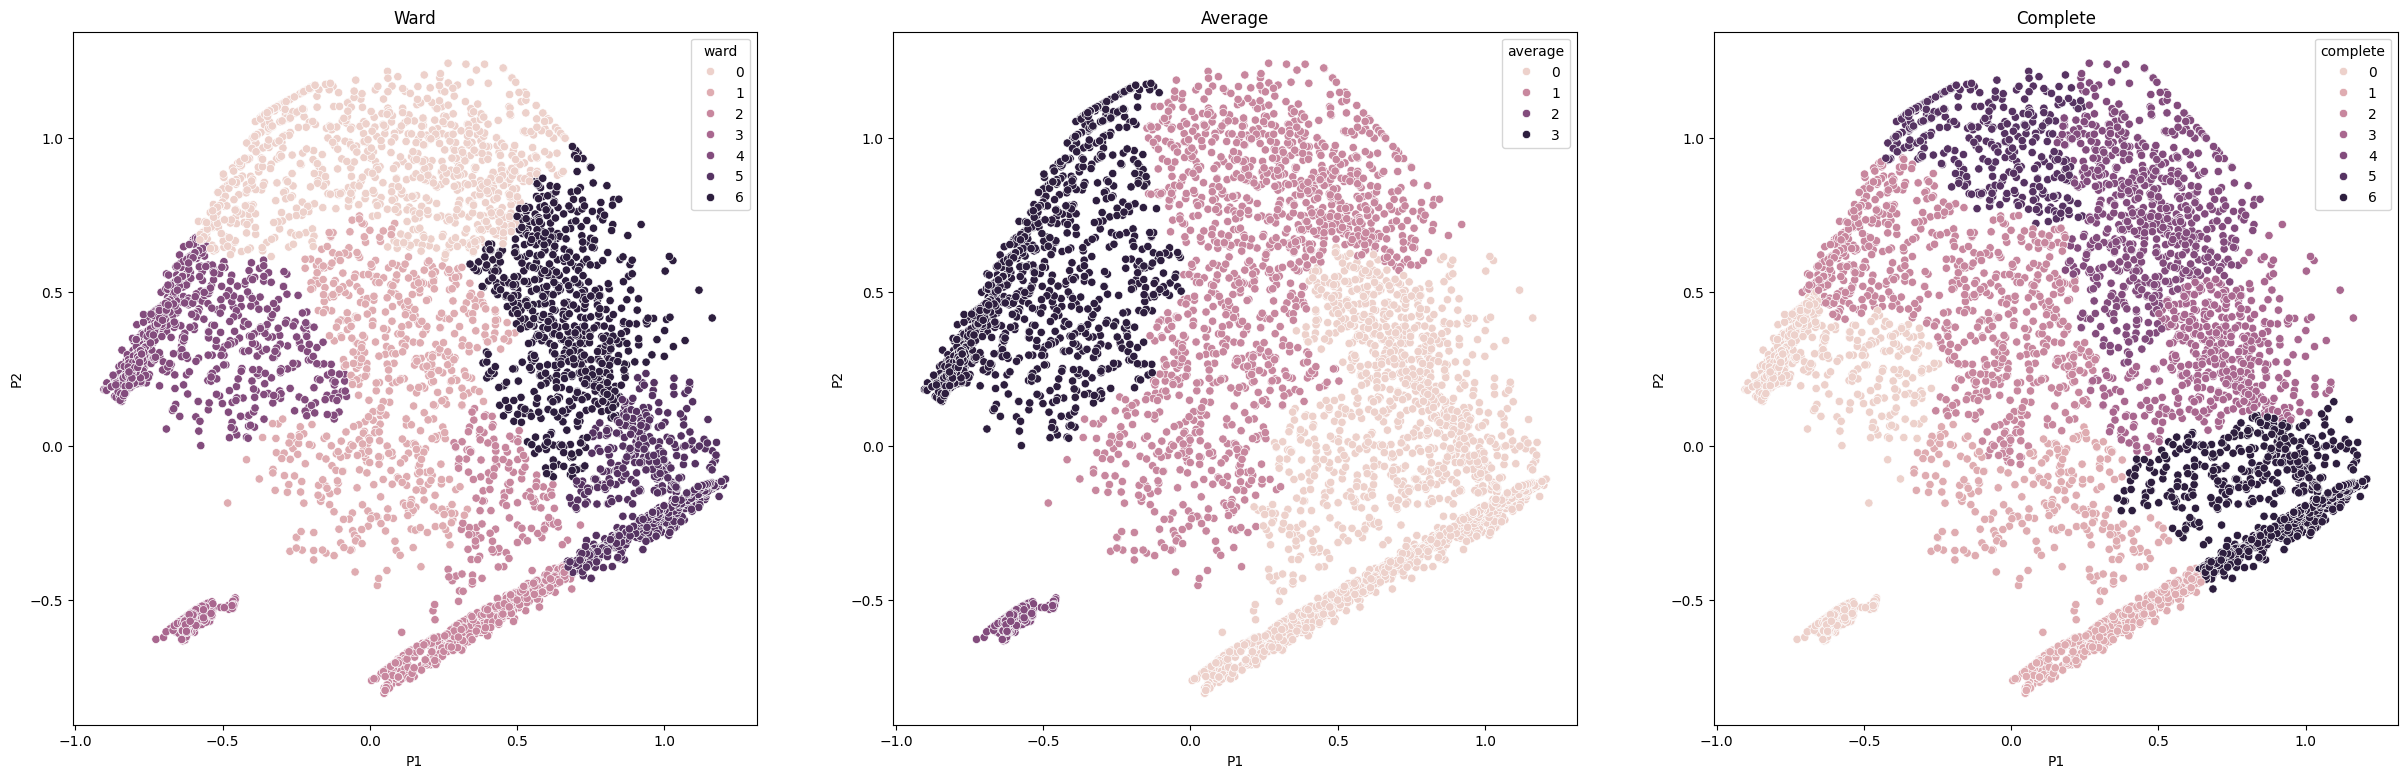

In [63]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['ward', 'average', 'complete']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 3, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_dend)
    plt.title(i.title())

While ward method have highest score above all of the other method, a lot of cluster(7 cluster) may cause confusion when analyze each cluster. Therefore, we choose Average method as the representative from agglomerative clustering since the number of cluster are 4 and the score are also good.

> ## **K-Means**

**K-Means Clustering** is a partitioning clustering method to separates data into defferent clusters. by itterative partitioning, its clustering is able to minimize the average of distance of each data to its cluster (MacQueen, 1967).

In [64]:
#creating list for scoring
avg_withinSS = []

#create loop to run the algorithm
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal)
    centroids = kmeans.cluster_centers_

    D_k = cdist(X_principal, centroids, 'euclidean')
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    avg_withinSS.append(sum(dist)/X_principal.shape[0])

#creating plot for elbow method visualization
fig = px.line(x=number_of_cluster, y=avg_withinSS, markers=True)
fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900)

In [65]:
# Create Accumulator for matric
kmeans_s_scores = []
kmeans_db_scores = []
kmeans_calinski_scores = []

#looping for modeling
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal)
    kmeans_labels = kmeans.predict(X_principal)
    kmeans_s_scores.append(silhouette_score(
        X_principal, kmeans_labels, metric='euclidean'))
    kmeans_db_scores.append(davies_bouldin_score(X_principal, kmeans_labels))
    kmeans_calinski_scores.append(
        calinski_harabasz_score(X_principal, kmeans_labels))

In [66]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_score = {'Silhouette': kmeans_s_scores,
                'Davies Bouldin': kmeans_db_scores,
                'Calinski-Harabasz': kmeans_calinski_scores}

for i, score in zip(np.arange(1, 4), kmeans_score):
    fig.append_trace(go.Scatter(
        x=list(number_of_cluster), y=kmeans_score[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')


In [67]:
#creating list for metrics
kmeans_std_s_scores = []
kmeans_std_db_scores = []
kmeans_std_calinski_scores = []

#parameter for checking the cluster stability
n_sets = 8
sets = np.array_split(X_principal, n_sets)

# calculates the scores and store in their respective list
for element in sets:
    kmeans = KMeans(n_clusters=4, random_state = 2022)
    kmeans.fit(element)
    kmeans_std_s_scores.append(silhouette_score(
        element, kmeans.labels_, metric='euclidean'))
    kmeans_std_db_scores.append(davies_bouldin_score(element, kmeans.labels_))
    kmeans_std_calinski_scores.append(
        calinski_harabasz_score(element, kmeans.labels_))

#check the cluster stability
print(f'Standard deviation Kmeans with {4} clusters:\nSilouette: {np.std(kmeans_std_s_scores)}\nDavies Bouldin: {np.std(kmeans_std_db_scores)}\nCalinski Harabasz: {np.std(kmeans_std_calinski_scores)}\n')

Standard deviation Kmeans with 4 clusters:
Silouette: 0.016017913003843903
Davies Bouldin: 0.015134644983310137
Calinski Harabasz: 256.52455362824253



In [68]:
#choosing 4 cluster as the best number of cluster
kmeans = KMeans(n_clusters=4, random_state = 2022)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=2022)

In [69]:
#plot to visualize the result
fig = px.scatter(X_principal, x='P1', y='P2',
                 color=list(map(lambda x: str(x), kmeans.labels_)))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers',
                         marker_color='rgba(152, 0, 0, .8)', marker_size=15, name='Centroids'))

fig.update_xaxes(title_text='P1')
fig.update_yaxes(title_text='P2')
fig.update_layout(height=700, width=800,
                  legend_title_text='Clusters',
                  title_text='K-Means with 4 Clusters')

> ## **K-Medoids**

**K-Medoids Clustering**, also known as Partitioning Around Medoids (PAM), is a variant of the K-Means method. It is based on the use of a medoid instead of observations held by each cluster, with the aim of reducing the sensitivity of the resulting partition with respect to the extreme values ​​present in the dataset (Vercellis, 2009).

We use 3 distance metrics :
1. **Cosine Similarity**: measure of similarity between two sequences of numbers.
1. **Euclidean Distance or Euclidean**: metric is the familiar and straightforward line between two elements or the minimum distance between two objects
1. **Manhattan Distance**: the distance between two points is the sum of the absolute differences of their Cartesian coordinates. Simply it is the sum of the difference between the x-coordinates and y-coordinates.

In [70]:
#creating list for metrics
manhattan_avg_withinSS = []
euclidean_avg_withinSS = []
cosine_avg_withinSS = []

#creating list for metrics
kmedoids_avg_withinSS = {'cityblock': manhattan_avg_withinSS,
                         'euclidean': euclidean_avg_withinSS,
                         'cosine': cosine_avg_withinSS}

#looping for running k-medoids
for i, j in product(kmedoids_avg_withinSS, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal)

    D_k = cdist(X_principal, kmedoids.cluster_centers_, i)
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    kmedoids_avg_withinSS[i].append(sum(dist)/X_principal.shape[0])

#creating plot to visualize elbow method scoring
fig = go.Figure()
for i in kmedoids_avg_withinSS:
    fig.add_trace(go.Scatter(x=list(number_of_cluster),
                  y=kmedoids_avg_withinSS[i],
                  name=i if i != 'cityblock' else 'manhattan'))

fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900, legend_title_text='Metrics')


In [71]:
# Create Accumulator for matric
manhattan_s_scores = []
manhattan_db_scores = []
manhattan_calinski_scores = []
euclidean_s_scores = []
euclidean_db_scores = []
euclidean_calinski_scores = []
cosine_s_scores = []
cosine_db_scores = []
cosine_calinski_scores = []

kmedoids_metrics = {'manhattan': [manhattan_s_scores, manhattan_db_scores, manhattan_calinski_scores, 'rgb(128,177,211)'],
                    'euclidean': [euclidean_s_scores, euclidean_db_scores, euclidean_calinski_scores, 'rgb(141,211,199)'],
                    'cosine': [cosine_s_scores, cosine_db_scores, cosine_calinski_scores, 'rgb(251,128,114)']}

#looping to run k-medoids by each distance metrics
for i, j in product(kmedoids_metrics, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal)
    kmedoids_metrics[i][0].append(silhouette_score(
        X_principal, kmedoids.labels_, metric=i))
    kmedoids_metrics[i][1].append(davies_bouldin_score(
        X_principal, kmedoids.labels_))
    kmedoids_metrics[i][2].append(calinski_harabasz_score(
        X_principal, kmedoids.labels_))


In [72]:
#creating plot to compare the result
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in kmedoids_metrics:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=kmedoids_metrics[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=kmedoids_metrics[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Metric Scores',
                  legend_traceorder='reversed')

We decided that 4 are the best number of cluster for each distance parameter by it's score stability.

In [73]:
#using 4 as number of clusters
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=4, random_state = 2022)
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=4, random_state = 2022)
kmedoids_cosine = KMedoids(metric="cosine", n_clusters=4, random_state = 2022)

#running the algorithm
kmedoids_manhattan.fit(X_principal)
kmedoids_euclidean.fit(X_principal)
kmedoids_cosine.fit(X_principal);

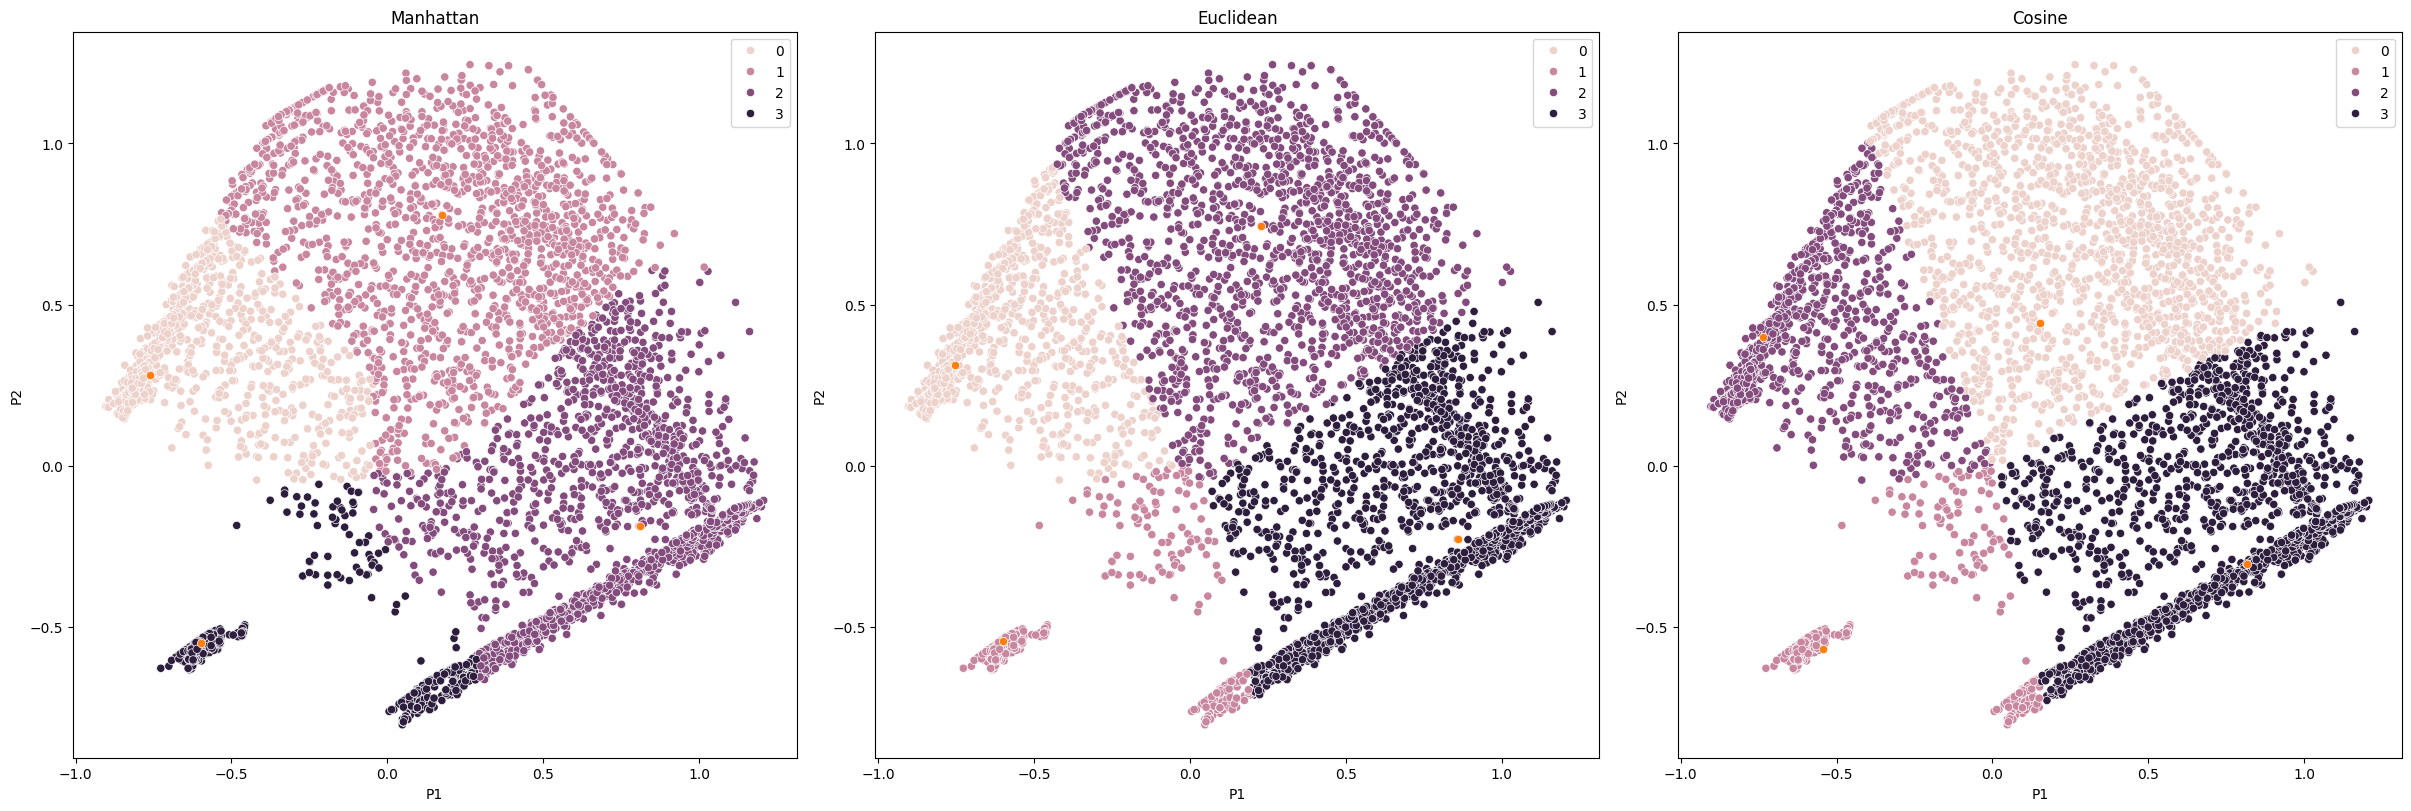

In [74]:
#creating plot to compare the result by each distance parameter
kmedoids_graph = {'Manhattan': kmedoids_manhattan,
                  'Euclidean': kmedoids_euclidean,
                  'Cosine': kmedoids_cosine}

plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(kmedoids_graph, range(1,4)):
    plt.subplot(1,3,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal,
                    hue= kmedoids_graph[i].labels_)
    sns.scatterplot(data = None,
                    x = kmedoids_graph[i].cluster_centers_[:,0],
                    y = kmedoids_graph[i].cluster_centers_[:,1])
    plt.title(i)

> ## **Compare Model**

we will compare best cluster each model :
1. Agglomerative with Average Linkage, n Cluster = 4
2. K Means, n Cluster = 4
3. K Medoids with Cosine Distance, n Cluster = 4

In [75]:
df_compare = pd.DataFrame({'Model' : ['Agglomerative (Average)', 'K-Means', 'K-Medoids (Cosine)'],
              'N Cluster' : [4, 4, 4],
              'Silhouette Score' : [average_s_scores[2], kmeans_s_scores[2], cosine_s_scores[2]],
              'Devies Bouldin Score' : [average_db_scores[2], kmeans_db_scores[2], cosine_db_scores[2]],
              'Calinski Harabasz Score' : [average_calinski_scores[2], kmeans_calinski_scores[2], cosine_calinski_scores[2]]
             })
df_compare

Model  N Cluster  Silhouette Score  Devies Bouldin Score  \
0  Agglomerative (Average)          4          0.547800              0.748187   
1                  K-Means          4          0.594153              0.605307   
2       K-Medoids (Cosine)          4          0.793798              0.605751   

   Calinski Harabasz Score  
0             12285.553170  
1             15797.202035  
2             15759.281845

The best model is K Medoids with Cosine distance, we choice k medoids for clustering the dataset

### **Best Model**

K-Medoid, Metric Distance =  "Cosine", n Cluster = 4

In [76]:
#choosing best model for clustering
model_fix = KMedoids(metric="cosine", n_clusters=4, random_state = 2022)
model_fix.fit(X_principal)
model_fix_centers = model_fix.cluster_centers_
model_fix_labels = model_fix.predict(X_principal)
model_fix_centers

array([[ 0.15277368,  0.44430275],
       [-0.54439581, -0.56792145],
       [-0.73581394,  0.40044335],
       [ 0.81658088, -0.30306642]])

In [77]:
#showing cluster
np.unique(model_fix_labels)

array([0, 1, 2, 3])

In [78]:
#add the cluster to dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster' :model_fix_labels})], axis = 1)
df_cluster.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  cluster  
0   201.802084        139.509787          0.000000    12.0        1  
1  4103.032597       1072.340217          0.222222    12.0        1  
2   622.066742        627.284787          0.000000    12.0        0  
3     0.000000        431.220633          0.000000    12.0        2  
4   678.334763        244.791237          0.000000    12.0        2

In [79]:
#cluster population
df_cluster['cluster'].value_counts()

cluster
3    2939
1    2287
2    2036
0    1688
Name: count, dtype: int64

### Visualization

In [80]:
#running PCA
pca_n = PCA(n_components = 2, random_state = 2022)
X_principal = pca_n.fit_transform(df_model)
df_X_principal = pd.DataFrame(X_principal, columns = ['Principal Component 1', 'Principal Component 2'])
df_X_principal.head(2)

Principal Component 1  Principal Component 2
0               0.120873              -0.686723
1              -0.574777              -0.531535

In [81]:
#combine pca and cluster
finalDf = pd.concat([df_X_principal, pd.DataFrame({'cluster':model_fix_labels})], axis = 1)
finalDf.head()

Principal Component 1  Principal Component 2  cluster
0               0.120873              -0.686723        1
1              -0.574777              -0.531535        1
2              -0.340687               1.088999        0
3              -0.827379               0.203195        2
4              -0.805437               0.244772        2

In [82]:
#plot for visualization
fig = go.Figure()

def cluster(cluster, color):
    fig.add_trace(go.Scatter(
        x=finalDf[finalDf.cluster == cluster]['Principal Component 1'],
        y=finalDf[finalDf.cluster == cluster]['Principal Component 2'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker_color=color))

for C in list(finalDf.cluster.unique()):
    if C == 0:
        cluster(0, 'red')
    elif C == 1:
        cluster(1, 'green')
    elif C == 2:
        cluster(2, 'blue')
    elif C == 3:
        cluster(3, 'purple')

fig.add_trace(go.Scatter(x=model_fix_centers[:, 0], y=model_fix_centers[:, 1], mode='markers',
                         marker_color='rgba(152, 0, 0, .8)', marker_size=15, name='Centroids'))

fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.update_layout(height=900, width=1100,
                  legend_title_text='Clusters',
                  title_text='K-Medoids with 4 Clusters')

### **Cluster Analysis**

In [83]:
#creating new df for cluster analysis
df_cluster = pd.concat([df_cluster, df_model[['oneoff_proportion',
                 'installments_proportion', 'payments_proportion']]], axis=1)

In [84]:
#separating the dataframe by cluster
cluster_0 = df_cluster[df_cluster['cluster'] == 0]
cluster_1 = df_cluster[df_cluster['cluster'] == 1]
cluster_2 = df_cluster[df_cluster['cluster'] == 2]
cluster_3 = df_cluster[df_cluster['cluster'] == 3]

In [85]:
#summary for each cluster
need_columns = ['balance', 'purchases', 'cash_advance', 'credit_limit', 'payments']
d={}
for i in need_columns:
    d[i] = pd.DataFrame(df_cluster.groupby('cluster', axis = 0)[i].describe()[['mean', '50%', 'min', 'max']])

pd.concat(d, axis =1)

balance                                        purchases  \
                mean          50%       min          max         mean   
cluster                                                                 
0        1867.071485   975.679015  1.198223  19043.13856  2948.853477   
1        2047.578186  1381.753281  0.000000  14581.45914    22.275111   
2        1520.726547   918.797179  0.000000  15258.22590   739.299317   
3        1045.056985   208.362536  0.000000  16304.88925   831.868663   

                                  cash_advance                                 \
              50%   min       max         mean          50%  min          max   
cluster                                                                         
0        1971.195  8.40  49039.57   661.414446     0.000000  0.0  29282.10915   
1           0.000  0.00   3000.00  1845.579159  1090.520215  0.0  26194.04954   
2         384.975  0.01  26784.62   935.488227     0.000000  0.0  20277.33112   
3         462.860  4.44  22500.00   516.820451     0.000000  0.0  47137.21176   

        credit_limit                             payments                    \
                mean     50%    min      max         mean          50%  min   
cluster                                                                       
0        6454.697329  6000.0  300.0  30000.0  3022.354523  1871.896384  0.0   
1        4033.301508  3000.0   50.0  19000.0  1608.335929   718.951070  0.0   
2        4392.651217  3000.0  150.0  30000.0  1485.728802   732.711626  0.0   
3        3797.320345  2700.0  300.0  23000.0  1261.209571   662.417377  0.0   

                      
                 max  
cluster               
0        46930.59824  
1        34107.07499  
2        50721.48336  
3        40627.59524

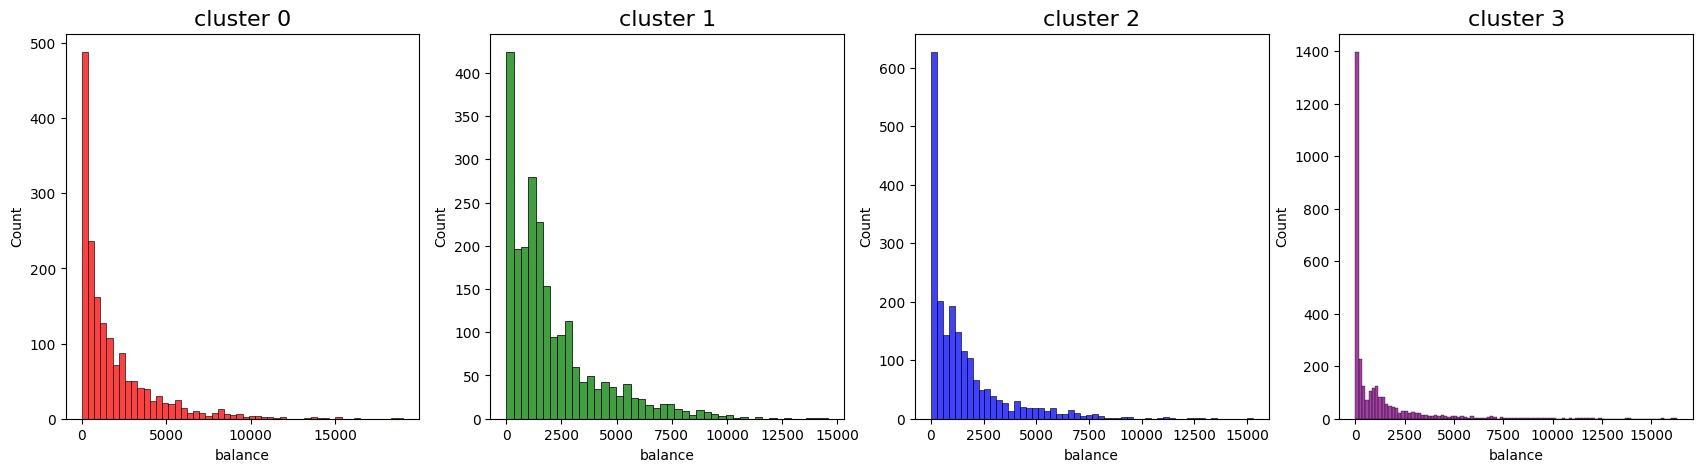

In [86]:
#plot comparison balance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['balance'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['balance'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['balance'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['balance'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

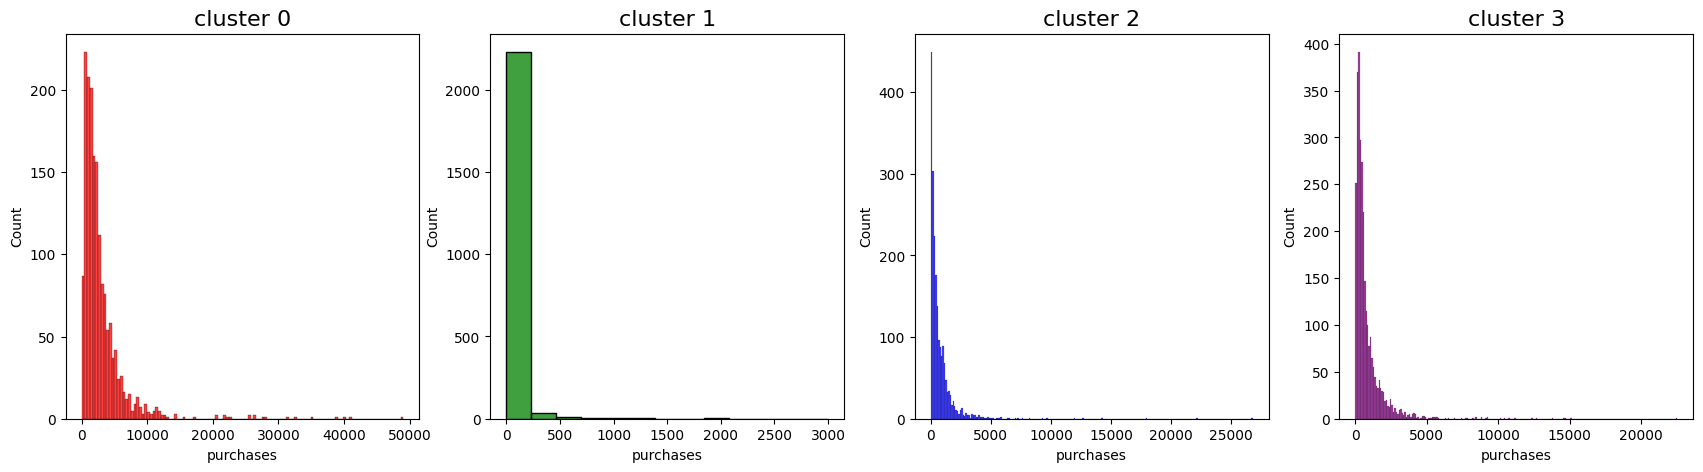

In [87]:
#plot comparison purchase from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['purchases'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['purchases'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['purchases'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['purchases'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

Text(0.5, 1.0, 'Purchases Persentage')

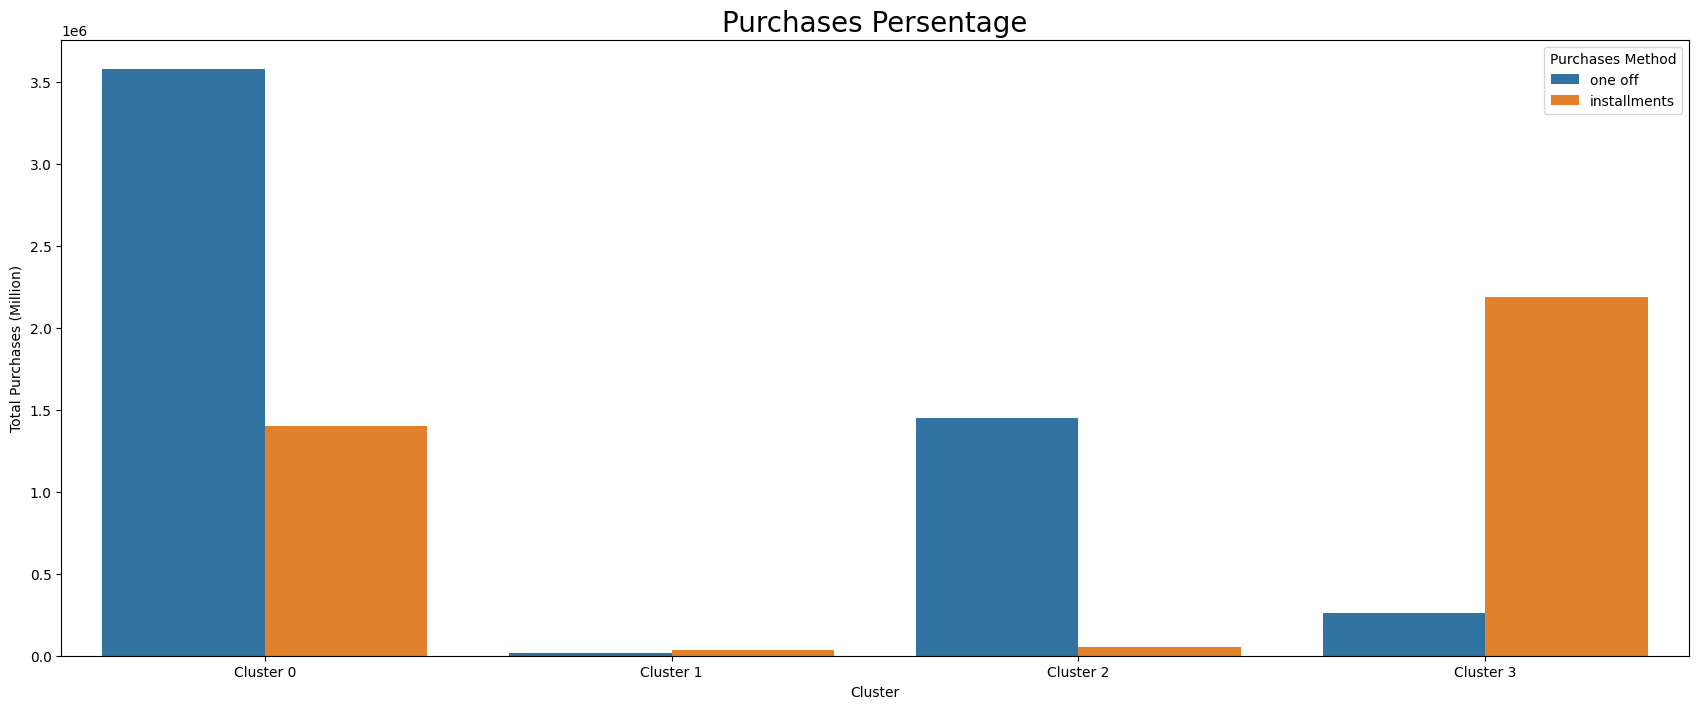

In [88]:
#Check Detail Purchases
plt.figure(figsize=(21,8))
ax = pd.DataFrame({'Cluster' : ['Cluster 0', 'Cluster 0', 'Cluster 1', 'Cluster 1','Cluster 2', 'Cluster 2','Cluster 3', 'Cluster 3'],
                    'Purchases' : [cluster_0['oneoff_purchases'].sum(),
                                   cluster_0['installments_purchases'].sum(),
                                   cluster_1['oneoff_purchases'].sum(),
                                   cluster_1['installments_purchases'].sum(),
                                   cluster_2['oneoff_purchases'].sum(),
                                   cluster_2['installments_purchases'].sum(),
                                   cluster_3['oneoff_purchases'].sum(),
                                   cluster_3['installments_purchases'].sum()],
                    'Purchases Method' : ['one off', 'installments', 'one off', 'installments', 'one off', 'installments', 'one off', 'installments']})
sns.barplot(x='Cluster', y='Purchases', data=ax, hue = 'Purchases Method' )
plt.ylabel('Total Purchases (Million)')
plt.xlabel('Cluster')
plt.title('Purchases Persentage', size = 20)

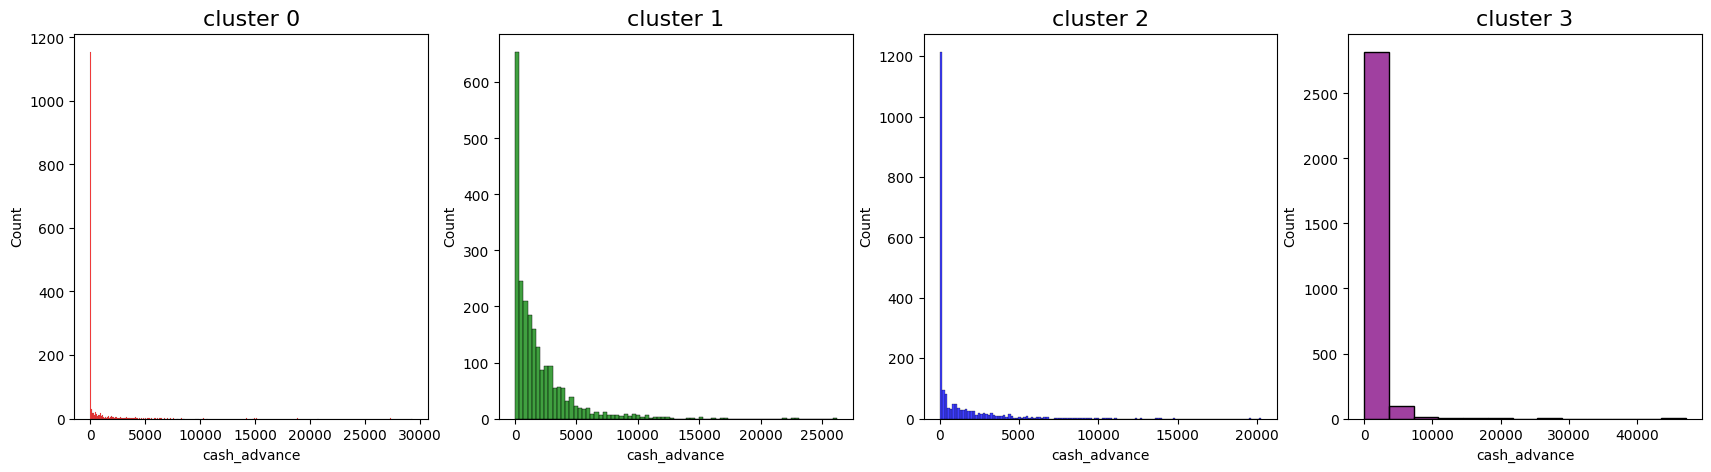

In [89]:
#plot comparison cash advance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['cash_advance'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['cash_advance'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['cash_advance'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['cash_advance'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

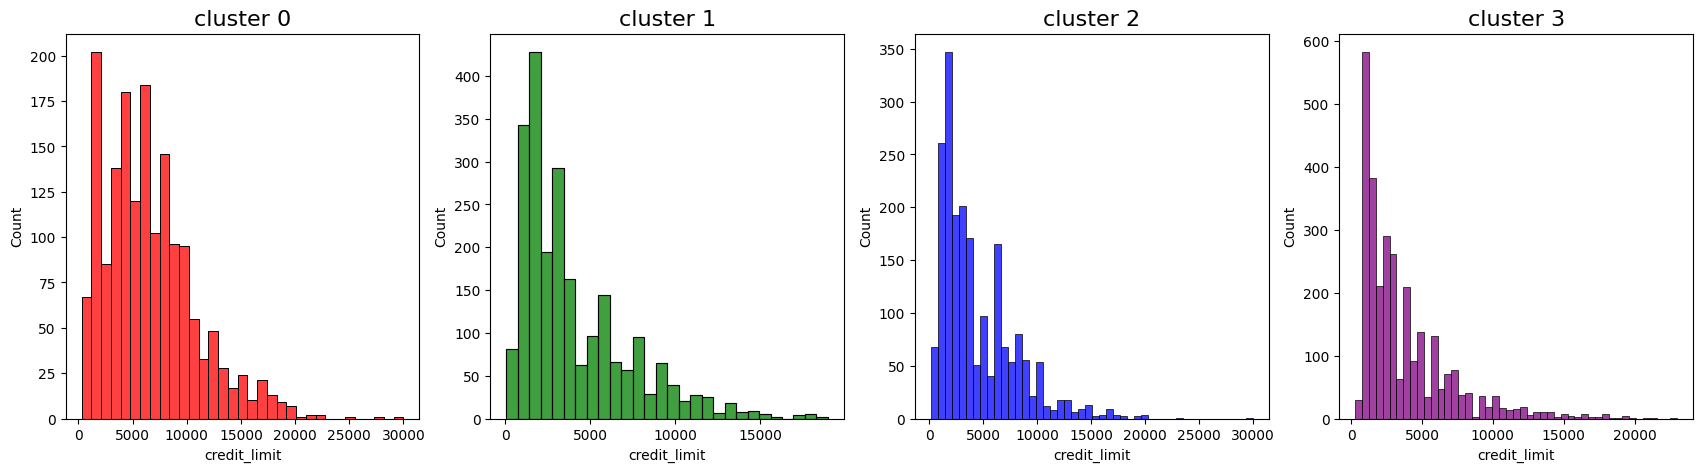

In [90]:
#plot comparison credit limit from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['credit_limit'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['credit_limit'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['credit_limit'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['credit_limit'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

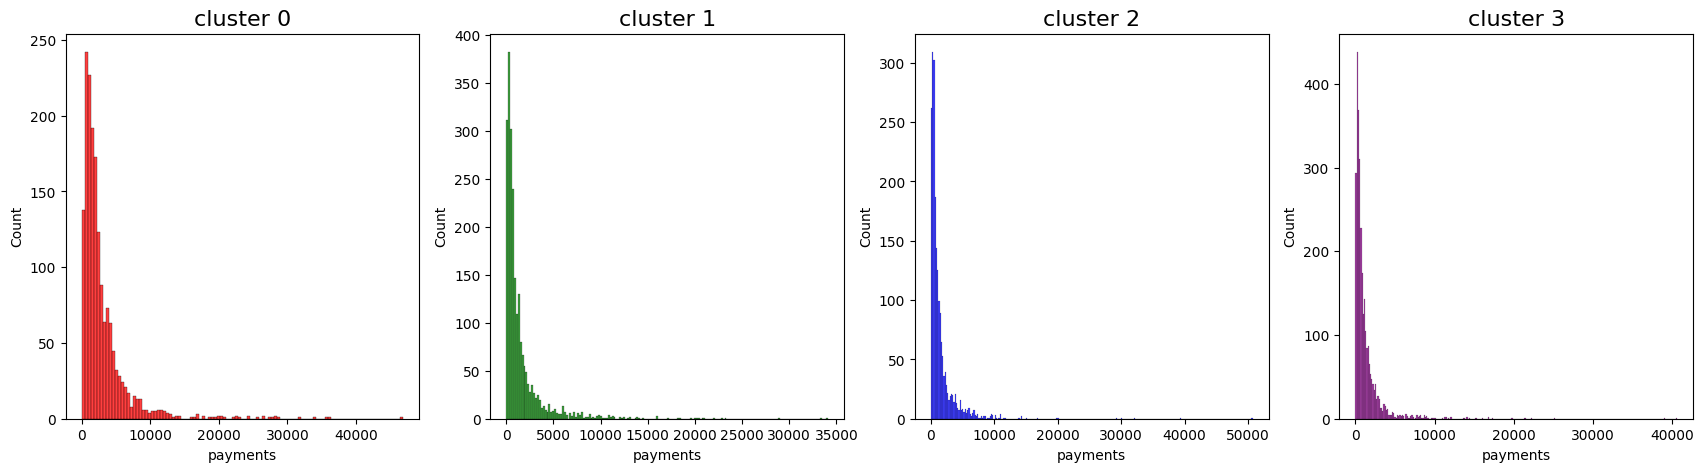

In [91]:
##plot comparison payments from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['payments'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['payments'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['payments'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['payments'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


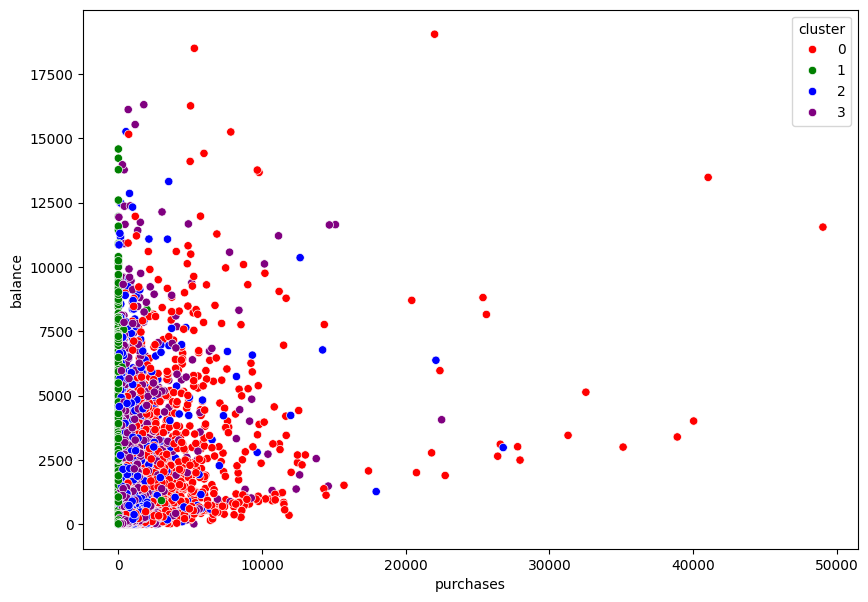

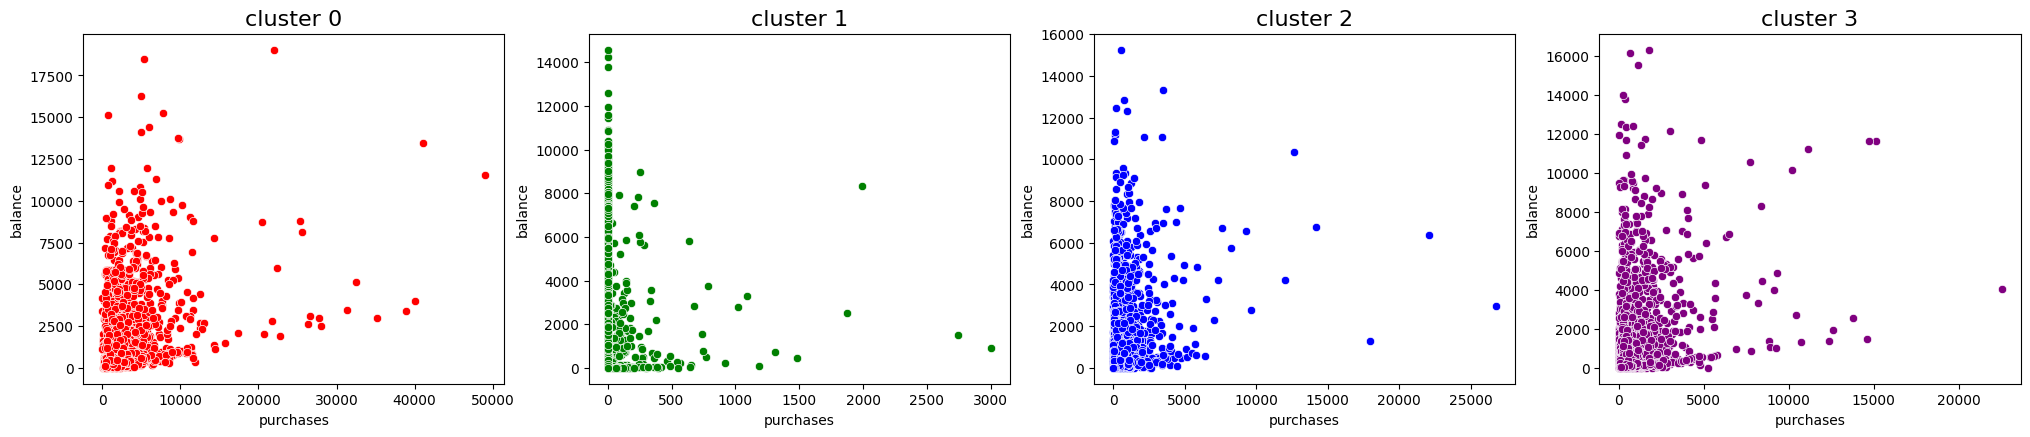

In [95]:
#plot comparison purchase from each cluster
#plot comparison purchase from each cluster
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_cluster, x = 'purchases', y = 'balance', hue = 'cluster',  palette=['red', 'green', 'blue', 'purple'])
plt.show()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
# Pass the DataFrame cluster_0 to the 'data' argument and specify x and y as column names
sns.scatterplot(data=cluster_0, x='purchases', y='balance', color='red')
plt.title('cluster 0', size = 16)
plt.subplot(2,4,2)
# Pass the DataFrame cluster_1 to the 'data' argument and specify x and y as column names
sns.scatterplot(data=cluster_1, x='purchases', y='balance', color='green')
plt.title('cluster 1', size = 16)
plt.subplot(2,4,3)
# Pass the DataFrame cluster_2 to the 'data' argument and specify x and y as column names
sns.scatterplot(data=cluster_2, x='purchases', y='balance', color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(2,4,4)
# Pass the DataFrame cluster_3 to the 'data' argument and specify x and y as column names
sns.scatterplot(data=cluster_3, x='purchases', y='balance', color='purple')
plt.title('cluster 3', size = 16)
plt.show()

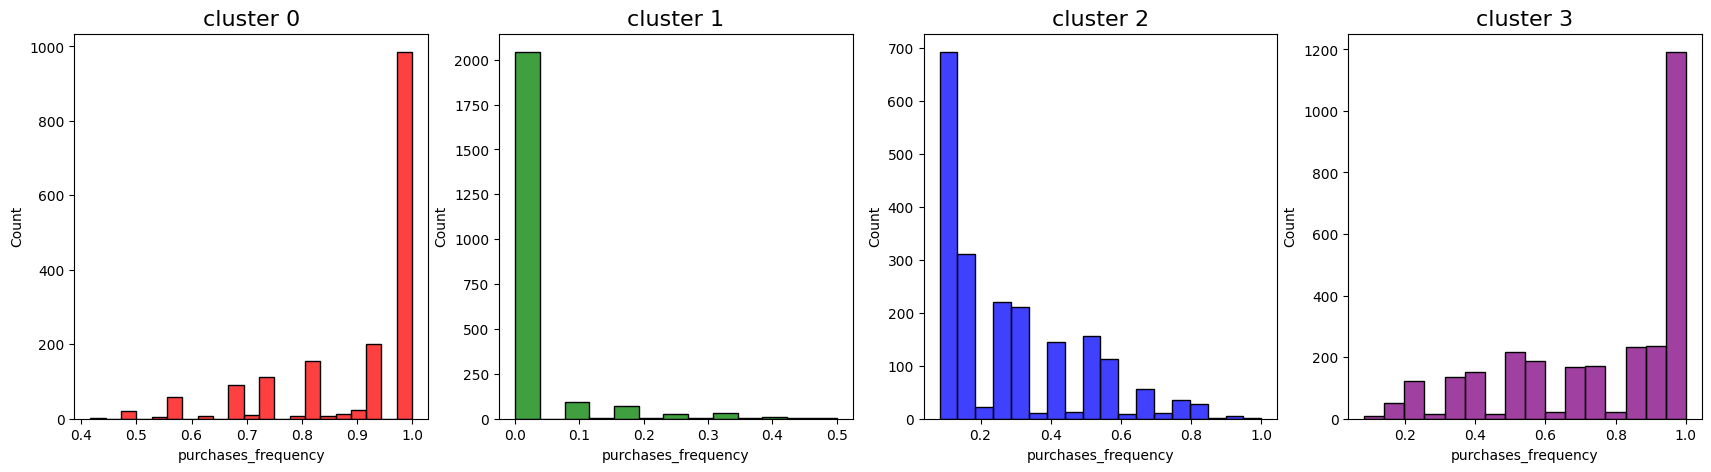

In [96]:
#plot comparison purchase frequency from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['purchases_frequency'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['purchases_frequency'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['purchases_frequency'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['purchases_frequency'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

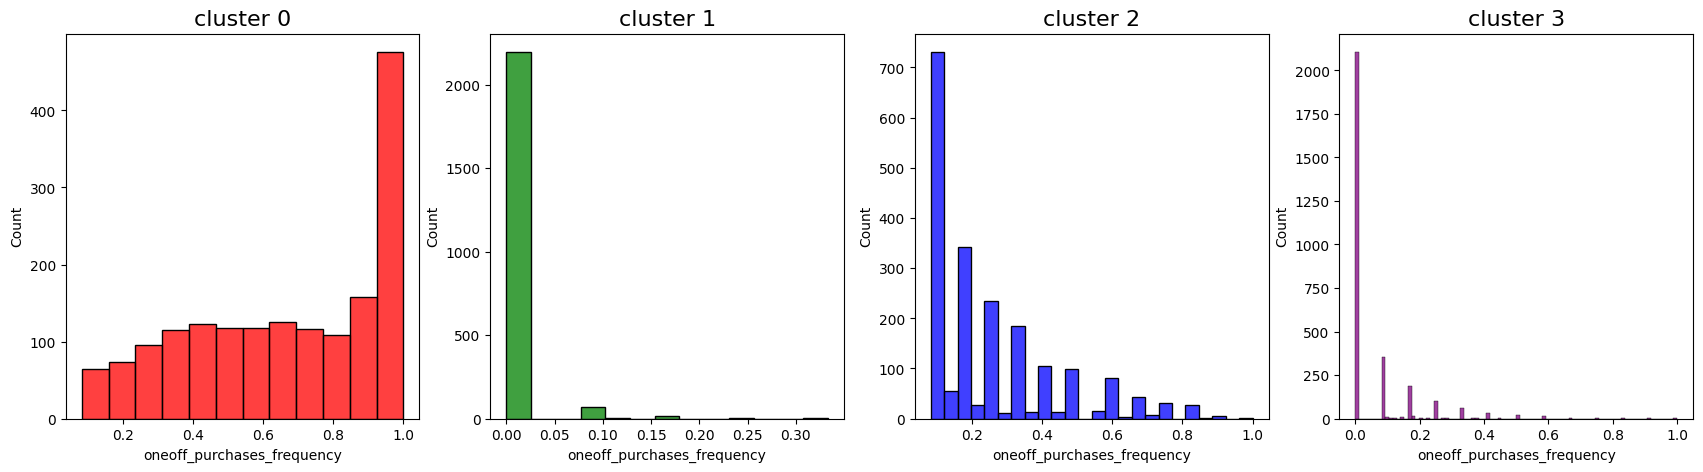

In [97]:
#plot comparison one off purchase from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['oneoff_purchases_frequency'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['oneoff_purchases_frequency'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['oneoff_purchases_frequency'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['oneoff_purchases_frequency'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

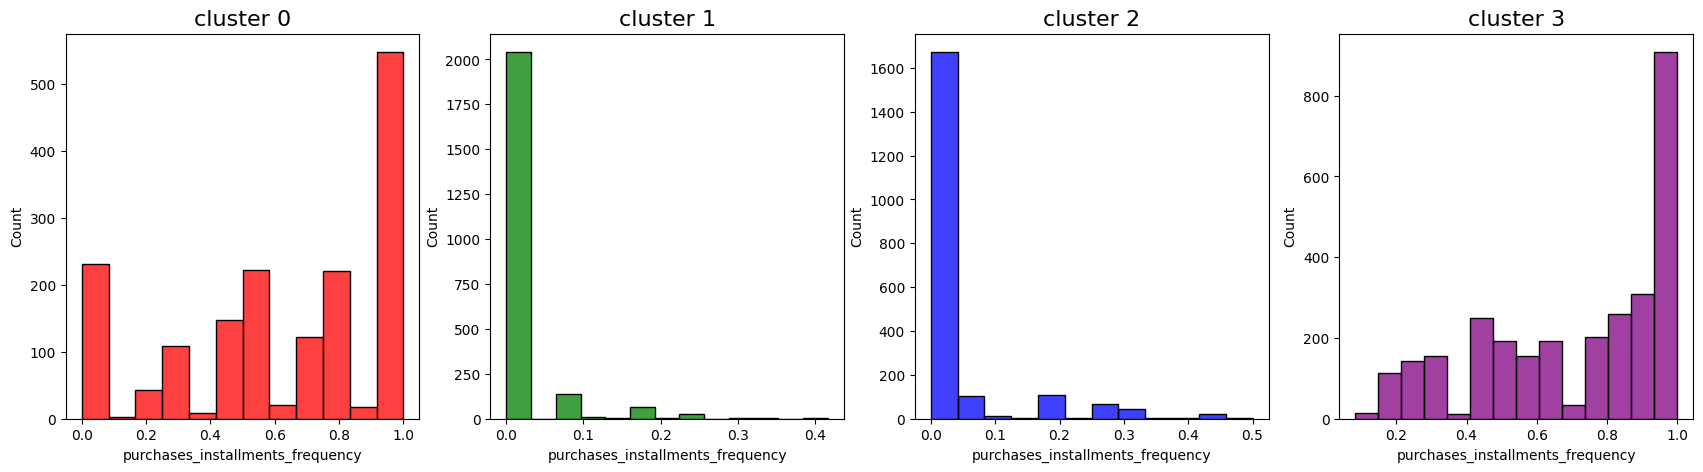

In [98]:
#plot comparison installment purchase from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['purchases_installments_frequency'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['purchases_installments_frequency'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['purchases_installments_frequency'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['purchases_installments_frequency'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

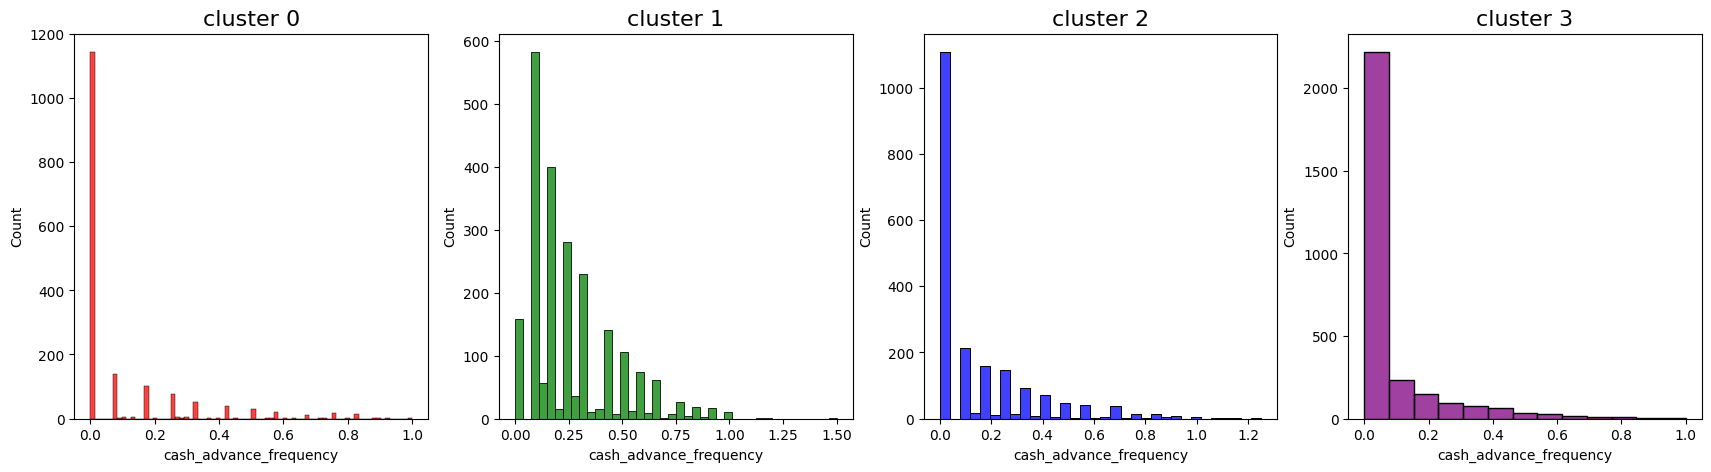

In [99]:
#plot comparison cash advance frequency from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['cash_advance_frequency'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['cash_advance_frequency'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['cash_advance_frequency'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['cash_advance_frequency'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

In [100]:
#3d plot for oneoff purchase frequency, purchase installment frequency, and cash advance frequency
fig = go.Figure()

def cluster3d(cluster, color):
    fig.add_trace(go.Scatter3d(
        x=df_cluster[df_cluster.cluster == cluster]['oneoff_purchases_frequency'],
        y=df_cluster[df_cluster.cluster == cluster]['purchases_installments_frequency'],
        z=df_cluster[df_cluster.cluster == cluster]['cash_advance_frequency'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker_color=color,
        marker_size=5))


for C in list(df_cluster.cluster.unique()):
    if C == 0:
        cluster3d(0, 'red')
    elif C == 1:
        cluster3d(1, 'green')
    elif C == 2:
        cluster3d(2, 'blue')
    elif C == 3:
        cluster3d(3, 'purple')

fig.update_layout(height=900, width=1100,
                  scene=dict(
                      xaxis_title='oneoff_purchases_frequency',
                      yaxis_title='purchases_installments_frequency',
                      zaxis_title='cash_advance_frequency'),
                  title_text='A 3D Projection Of Data In The Reduced Dimension')

<a id="conclusion"></a>
## **Conclusion and Recommendation**

### **Cluster 0**

### **Balance Spender**

**Characteristic:**

- Balance up to 5500
- Love to spend
- Made purchase up to 7200, from total purchases, 72% of it contains one off purchase and 28% of it contains installment purchase
- Have Credit Limit Mosly up to 16000
- Oneoff purchase up to 4900
- Installment purchase up to 2374
- Using cash advance up to 800

**Analysis :**
    
Users in this cluster are users who like to shop using the one-time payment method (one off purchases), we assume users in this cluster use a credit card to make monthly routine payments like as paying for electricity bill, monthly consumption, or other monthly needs. So users in this cluster tend to use credit cards only to delay payment, not to pay in installments. And and our assumption is that users in this cluster also collect credit card points. We assume in customer profil in this cluster is a adults have families.

**Strategy :**
    
1. Since our strategy is made them to use more purchase using installment, we could give some benefit like if they made purchase using credit rather than one off payment, they could obtain some discount, increase their credit card membership level, etc
1. Provide auto debit facilities to users, and provide bonus points or cashback for users who register their auto debit.
1. Collaborating  with service providers or monthly necessities so that they can provide discounts or additional special points for users who make payments using credit cards. For example, working with Perusahaan Listrik Negara (PLN) to provide discounts for monthly electricity bills or purchasing electricity tokens using a credit card
1. Collaborating with service providers or monthly necessities to create a program to pay a lump sum for a certain period which is certainly cheaper than paying monthly with a credit card that can be paid in installments with 0% interest. For example, Collaborating with PLN, for electricity payments, assuming the monthly payment is 1 million. if the payment is direct or lump sum for a period of 1 year only need to pay 11 million. And users can using the lump sum payment installment facility (one off purchases) into installments in 6 months or 12 months with 0% interest
1. Provide the facility of changing from full payment (one off purchases) to installment without additional fees

## **Cluster 1**

### **Money Hoarders**

**Characteristic :**

- Balance up to 6000
- Rarely spends money
- Using cash advance up to 5900
- Have Credit limit up to 12750
- Made payments up to 3600

**Analysis :**

This user mostly have a high balance but almost never spends it whether using credit card or not. We could assume this kind of users use their money mostly for investing activities or as saving account.

**Strategy :**

1. This could give marketing team a lead like survey the characteristic of the customer like age(since the more mature they are, usually they rarely spends money) or why they put their money in this account.
1. Collaborating with platforms or securities investment service providers to provide features to top up using a credit card, and provide bonus points or cashback when the user tops up with his credit card.

### **Cluster 2**

### **Potential Customer**

**Characteristics :**
- Have Balance up to 4600
- Made purchase up to 2000, 95% of it contains One off purchase
- Using cash advance up to 2500
- Spends alot on One Off purchase rather than installment
- Have credit limit 12300
- Made Payments up to 3400

**Analysis :**

Users in this cluster more often paid without installment. We assume that users in this cluster are most likely made a purchase to avoid interest from credit card.
    
**Strategy :**

1. Provide the facility of changing from full payment (one off purchases) to installment without additional fees.
1. This could lead marketing team to check the customer profile whether this type of customer doesn't use the credit facilities due to high interest or any specific reason

### **Cluster 3**

### **Credit Lovers**

**Characteristics :**

- Have balance up to 3000
- Made purchase up to 2000, 80% of it contains installment purchase
- Made one off purchase up to 120
- Made Installment purchase up to 1800
- Rarely using cash advance
- Have credit limit up to 10000
- Made payment up to 3000

**Analysis** :

Users in this cluster are users who have a low balance and have a small credit limit. users in this cluster are very fond of shopping and use installment payments, and rarely use full payments. Our assumption is that the users in this cluster are fresh graduate users and just have a credit card, so they have a relatively small limit.

**Strategy** :

1. Collaborating with various shopping platforms such as several e-commerce platforms by holding a 0% installment program and cashback with a low monimum payments like 50 dollar, to attract the user's attention
1. Collaborating with big fashion brands such as Nike Adidas or Zara, to provide promos for users who use credit cards with installment payments
1. Consider increase the credit limit for customer who already using the credit limit to its fullest but have a good payment and balance.
1. This could lead the marketing team to check the customer profile to check whether the payments are smooth or not.

### **Recommendation**

For the Data:

1. Add more data to the dataset for better modeling.
2. We could use realtime dataset for better result.
3. Add more feature related like Credit Card Type(Silver, Gold, Plat), the date they made the transaction (for trend analysis), customer profile (students, worker, etc), age, income user, work experience.

For modeling:

1. The cluster result also could be used as a feature or target.
2. The feature we added like (oneoff_proportion, installment purchase, etc) could be used for SPL(Supervices Learneing) Regression to predict a credit limit for new user and SPL Classification for categorize new user to which cluster they are.

------

**Save CSV - for tableau**

In [101]:
save = pd.concat([df, pd.DataFrame(
    {'cluster': model_fix_labels})], axis=1)
save.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  cluster  
0   201.802084        139.509787          0.000000    12.0        1  
1  4103.032597       1072.340217          0.222222    12.0        1  
2   622.066742        627.284787          0.000000    12.0        0  
3     0.000000        431.220633          0.000000    12.0        2  
4   678.334763        244.791237          0.000000    12.0        2

In [102]:
save = pd.concat([save, df_model[['oneoff_proportion',
                 'installments_proportion', 'payments_proportion']]], axis=1)
save.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   purchases_trx  credit_limit     payments  minimum_payments  \
0            2.0        1000.0   201.802084        139.509787   
1            0.0        7000.0  4103.032597       1072.340217   
2           12.0        7500.0   622.066742        627.284787   
3            1.0        7500.0     0.000000        431.220633   
4            1.0        1200.0   678.334763        244.791237   

   prc_full_payment  tenure  cluster  oneoff_proportion  \
0          0.000000    12.0        1                0.0   
1          0.222222    12.0        1                0.0   
2          0.000000    12.0        0                1.0   
3          0.000000    12.0        2                1.0   
4          0.000000    12.0        2                1.0   

   installments_proportion  payments_proportion  
0                      1.0             0.000000  
1                      0.0             0.222222  
2                      0.0             0.000000  
3                      0.0             0.000000  
4                      0.0             0.000000  

[5 rows x 22 columns]

In [103]:
save.drop('prc_full_payment', axis=1, inplace=True)

In [104]:
save

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  ...  \
0                       0.000000                          0.083333  ...   
1                       0.000000                          0.000000  ...   
2                       1.000000                          0.000000  ...   
3                       0.083333                          0.000000  ...   
4                       0.083333                          0.000000  ...   
...                          ...                               ...  ...   
8945                    0.000000                          0.833333  ...   
8946                    0.000000                          0.833333  ...   
8947                    0.000000                          0.666667  ...   
8948                    0.000000                          0.000000  ...   
8949                    0.666667                          0.000000  ...   

      cash_advance_trx  purchases_trx  credit_limit     payments  \
0                  0.0            2.0        1000.0   201.802084   
1                  4.0            0.0        7000.0  4103.032597   
2                  0.0           12.0        7500.0   622.066742   
3                  1.0            1.0        7500.0     0.000000   
4                  0.0            1.0        1200.0   678.334763   
...                ...            ...           ...          ...   
8945               0.0            6.0        1000.0   325.594462   
8946               0.0            6.0        1000.0   275.861322   
8947               0.0            5.0        1000.0    81.270775   
8948               2.0            0.0         500.0    52.549959   
8949               2.0           23.0        1200.0    63.165404   

      minimum_payments  tenure  cluster  oneoff_proportion  \
0           139.509787    12.0        1                0.0   
1          1072.340217    12.0        1                0.0   
2           627.284787    12.0        0                1.0   
3           431.220633    12.0        2                1.0   
4           244.791237    12.0        2                1.0   
...                ...     ...      ...                ...   
8945         48.886365     6.0        3                0.0   
8946        346.308639     6.0        3                0.0   

In [105]:
save = save[['cust_id', 'balance', 'balance_frequency',
             'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance',
             'oneoff_proportion', 'installments_proportion',
             'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency',
             'purchases_trx', 'cash_advance_trx',
             'credit_limit', 'payments', 'minimum_payments', 'payments_proportion',
             'tenure', 'cluster']]


In [106]:
Cluster_Name = []

for i in save['cluster'] :
    if i == 0 :
        Cluster_Name.append('Balance Spender')
    elif i == 1 :
        Cluster_Name.append('Money Hoarders')
    elif i == 2 :
        Cluster_Name.append('Potential Customer')
    elif i == 3 :
        Cluster_Name.append('Credit Lovers')

In [107]:
save['Cluster Name'] = Cluster_Name
save.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  oneoff_proportion  \
0                    95.4      0.000000                0.0   
1                     0.0   6442.945483                0.0   
2                     0.0      0.000000                1.0   
3                     0.0    205.788017                1.0   
4                     0.0      0.000000                1.0   

   installments_proportion  purchases_frequency  ...  cash_advance_frequency  \
0                      1.0             0.166667  ...                0.000000   
1                      0.0             0.000000  ...                0.250000   
2                      0.0             1.000000  ...                0.000000   
3                      0.0             0.083333  ...                0.083333   
4                      0.0             0.083333  ...                0.000000   

   purchases_trx  cash_advance_trx  credit_limit     payments  \
0            2.0               0.0        1000.0   201.802084   
1            0.0               4.0        7000.0  4103.032597   
2           12.0               0.0        7500.0   622.066742   
3            1.0               1.0        7500.0     0.000000   
4            1.0               0.0        1200.0   678.334763   

   minimum_payments  payments_proportion  tenure  cluster        Cluster Name  
0        139.509787             0.000000    12.0        1      Money Hoarders  
1       1072.340217             0.222222    12.0        1      Money Hoarders  
2        627.284787             0.000000    12.0        0     Balance Spender  
3        431.220633             0.000000    12.0        2  Potential Customer  
4        244.791237             0.000000    12.0        2  Potential Customer  

[5 rows x 22 columns]

In [108]:
save.to_csv('CC with Cluster.csv', index=False)